In [57]:
# importing packages to be used
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
import matplotlib.cm as cm


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


from sklearn.tree import DecisionTreeClassifier, plot_tree

In [58]:
amazon_df = pd.read_csv("amazon_customer_data.csv")
amazon_df.head()

Timestamp  age             Gender  \
0  2023/06/04 1:28:19 PM GMT+5:30   23             Female   
1  2023/06/04 2:30:44 PM GMT+5:30   23             Female   
2  2023/06/04 5:04:56 PM GMT+5:30   24  Prefer not to say   
3  2023/06/04 5:13:00 PM GMT+5:30   24             Female   
4  2023/06/04 5:28:06 PM GMT+5:30   22             Female   

       Purchase_Frequency                                Purchase_Categories  \
0       Few times a month                           Beauty and Personal Care   
1            Once a month                               Clothing and Fashion   
2       Few times a month    Groceries and Gourmet Food;Clothing and Fashion   
3            Once a month  Beauty and Personal Care;Clothing and Fashion;...   
4  Less than once a month      Beauty and Personal Care;Clothing and Fashion   

  Personalized_Recommendation_Frequency Browsing_Frequency  \
0                                   Yes   Few times a week   
1                                   Yes  Few times a month   
2                                    No  Few times a month   
3                             Sometimes  Few times a month   
4                                   Yes  Few times a month   

  Product_Search_Method Search_Result_Exploration  \
0               Keyword            Multiple pages   
1               Keyword            Multiple pages   
2               Keyword            Multiple pages   
3               Keyword                First page   
4                Filter            Multiple pages   

   Customer_Reviews_Importance  ... Saveforlater_Frequency Review_Left  \
0                            1  ...              Sometimes         Yes   
1                            1  ...                 Rarely          No   
2                            2  ...                 Rarely          No   
3                            5  ...              Sometimes         Yes   
4                            1  ...                 Rarely          No   

  Review_Reliability Review_Helpfulness  \
0       Occasionally                Yes   
1            Heavily                Yes   
2       Occasionally                 No   
3            Heavily                Yes   
4            Heavily                Yes   

  Personalized_Recommendation_Frequency  Recommendation_Helpfulness  \
0                                      2                        Yes   
1                                      2                  Sometimes   
2                                      4                         No   
3                                      3                  Sometimes   
4                                      4                        Yes   

  Rating_Accuracy   Shopping_Satisfaction    Service_Appreciation  \
0                1                      1      Competitive prices   
1                3                      2  Wide product selection   
2                3                      3      Competitive prices   
3                3                      4      Competitive prices   
4                2                      2      Competitive prices   

              Improvement_Areas  
0      Reducing packaging waste  
1      Reducing packaging waste  
2  Product quality and accuracy  
3  Product quality and accuracy  
4  Product quality and accuracy  

[5 rows x 23 columns]

In [59]:
amazon_df["Service_Appreciation"].value_counts()

Service_Appreciation
Product recommendations                185
Competitive prices                     182
Wide product selection                 150
User-friendly website/app interface     80
.                                        1
Customer service                         1
Customer service                         1
Quick delivery                           1
All the above                            1
Name: count, dtype: int64

In [60]:
amazon_df["Improvement_Areas"].value_counts()

Improvement_Areas
Customer service responsiveness                                                   217
Product quality and accuracy                                                      159
Reducing packaging waste                                                          133
Shipping speed and reliability                                                     79
Quality of product is very poor according to the big offers                         1
I don't have any problem with Amazon                                                1
User interface of app                                                               1
Irrelevant product suggestions                                                      1
User interface                                                                      1
I have no problem with Amazon yet. But others tell me about the refund issues       1
UI                                                                                  1
Scrolling option would be much bette

In [61]:
amazon_df.shape

(602, 23)

In [62]:
amazon_df = amazon_df.drop(amazon_df.columns[0], axis=1)
len(amazon_df)

602

In [63]:
amazon_df.sample(10)

age             Gender      Purchase_Frequency  \
390   43               Male             Once a week   
264   23             Female       Few times a month   
547   21               Male   Multiple times a week   
166   24  Prefer not to say       Few times a month   
298   47             Female            Once a month   
531   50             Female       Few times a month   
267   23             Female  Less than once a month   
456   45             Female            Once a month   
150   63               Male  Less than once a month   
466   56  Prefer not to say             Once a week   

                                   Purchase_Categories  \
390  Beauty and Personal Care;Clothing and Fashion;...   
264                               Clothing and Fashion   
547  Beauty and Personal Care;Clothing and Fashion;...   
166  Beauty and Personal Care;Clothing and Fashion;...   
298                               Clothing and Fashion   
531  Beauty and Personal Care;Clothing and Fashion;...   
267                    Beauty and Personal Care;others   
456          Beauty and Personal Care;Home and Kitchen   
150  Groceries and Gourmet Food;Home and Kitchen;ot...   
466                               Clothing and Fashion   

    Personalized_Recommendation_Frequency    Browsing_Frequency  \
390                             Sometimes      Few times a week   
264                                    No      Few times a week   
547                             Sometimes                Rarely   
166                             Sometimes     Few times a month   
298                                    No  Multiple times a day   
531                                    No      Few times a week   
267                                    No     Few times a month   
456                                   Yes      Few times a week   
150                                    No                Rarely   
466                             Sometimes     Few times a month   

    Product_Search_Method Search_Result_Exploration  \
390               Keyword            Multiple pages   
264                Filter                First page   
547               Keyword            Multiple pages   
166            categories                First page   
298            categories            Multiple pages   
531               Keyword            Multiple pages   
267               Keyword            Multiple pages   
456            categories            Multiple pages   
150               Keyword            Multiple pages   
466            categories            Multiple pages   

     Customer_Reviews_Importance Add_to_Cart_Browsing  ...  \
390                            1                  Yes  ...   
264                            2                Maybe  ...   
547                            5                Maybe  ...   
166                            1                   No  ...   
298                            2                  Yes  ...   
531                            3                   No  ...   
267                            5                  Yes  ...   
456                            3                Maybe  ...   
150                            1                  Yes  ...   
466                            3                Maybe  ...   

    Saveforlater_Frequency Review_Left Review_Reliability Review_Helpfulness  \
390              Sometimes          No       Occasionally                 No   
264                  Often         Yes             Rarely                 No   
547                  Often         Yes         Moderately                Yes   
166                 Rarely          No       Occasionally          Sometimes   
298              Sometimes         Yes         Moderately                Yes   
531              Sometimes          No             Rarely          Sometimes   
267                 Always          No            Heavily                Yes   
456              Sometimes          No       Occasionally          Sometimes   
150          

In [64]:
amazon_df = amazon_df.dropna()

# Descriptive Analysis

In [65]:
amazon_df["age"].value_counts()

age
23    123
34     48
24     40
25     36
45     34
21     29
26     27
32     19
22     17
27     17
36     16
35     15
37     14
46     12
40     12
31      9
29      9
28      9
56      8
30      8
33      7
18      7
54      6
43      6
50      5
44      5
20      5
16      5
47      5
38      4
41      4
42      4
19      4
17      4
39      4
60      3
48      3
67      2
15      2
57      2
53      2
62      1
64      1
49      1
63      1
58      1
52      1
3       1
55      1
12      1
Name: count, dtype: int64

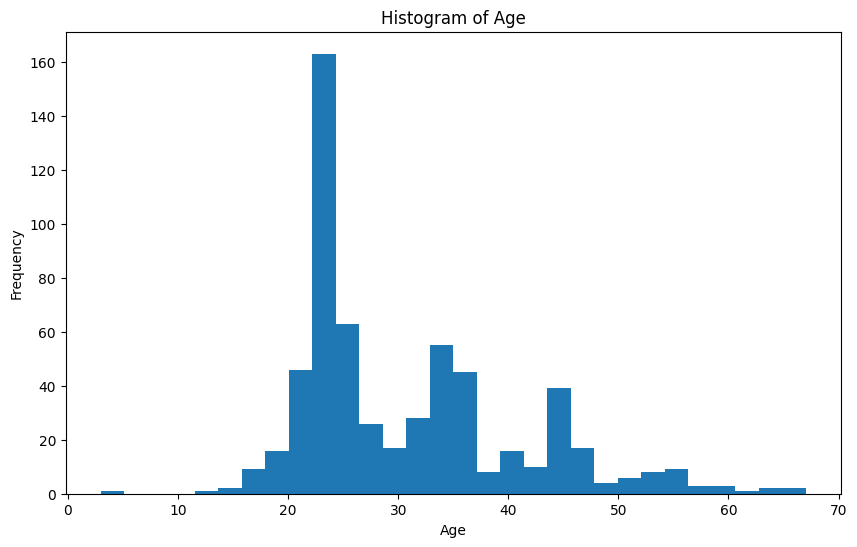

In [66]:
plt.figure(figsize=(10, 6))
plt.hist(amazon_df["age"], bins=30)
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

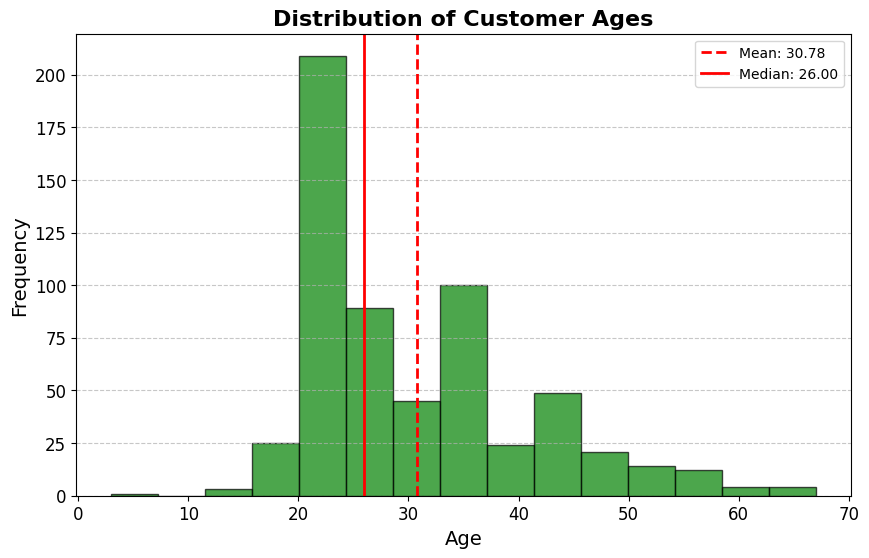

In [67]:
# Calculate the mean
mean_age = np.mean(amazon_df["age"])
median_age = np.median(amazon_df["age"])

plt.figure(figsize=(10, 6))

# Plot histogram
plt.hist(amazon_df["age"], bins=15, color="Green", edgecolor="black", alpha=0.7)

# Add a vertical line at the mean
plt.axvline(
    mean_age, color="red", linestyle="--", linewidth=2, label=f"Mean: {mean_age:.2f}"
)

# add line for median
plt.axvline(
    median_age,
    color="red",
    linestyle="-",
    linewidth=2,
    label=f"Median: {median_age:.2f}",
)

# Title and labels
plt.title("Distribution of Customer Ages", fontsize=16, fontweight="bold")
plt.xlabel("Age", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Customize tick parameters
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show grid for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Add legend to explain the red line
plt.legend()

# Display the plot
plt.show()

In [68]:
amazon_df["age"].describe()

count    600.000000
mean      30.780000
std       10.180914
min        3.000000
25%       23.000000
50%       26.000000
75%       36.000000
max       67.000000
Name: age, dtype: float64

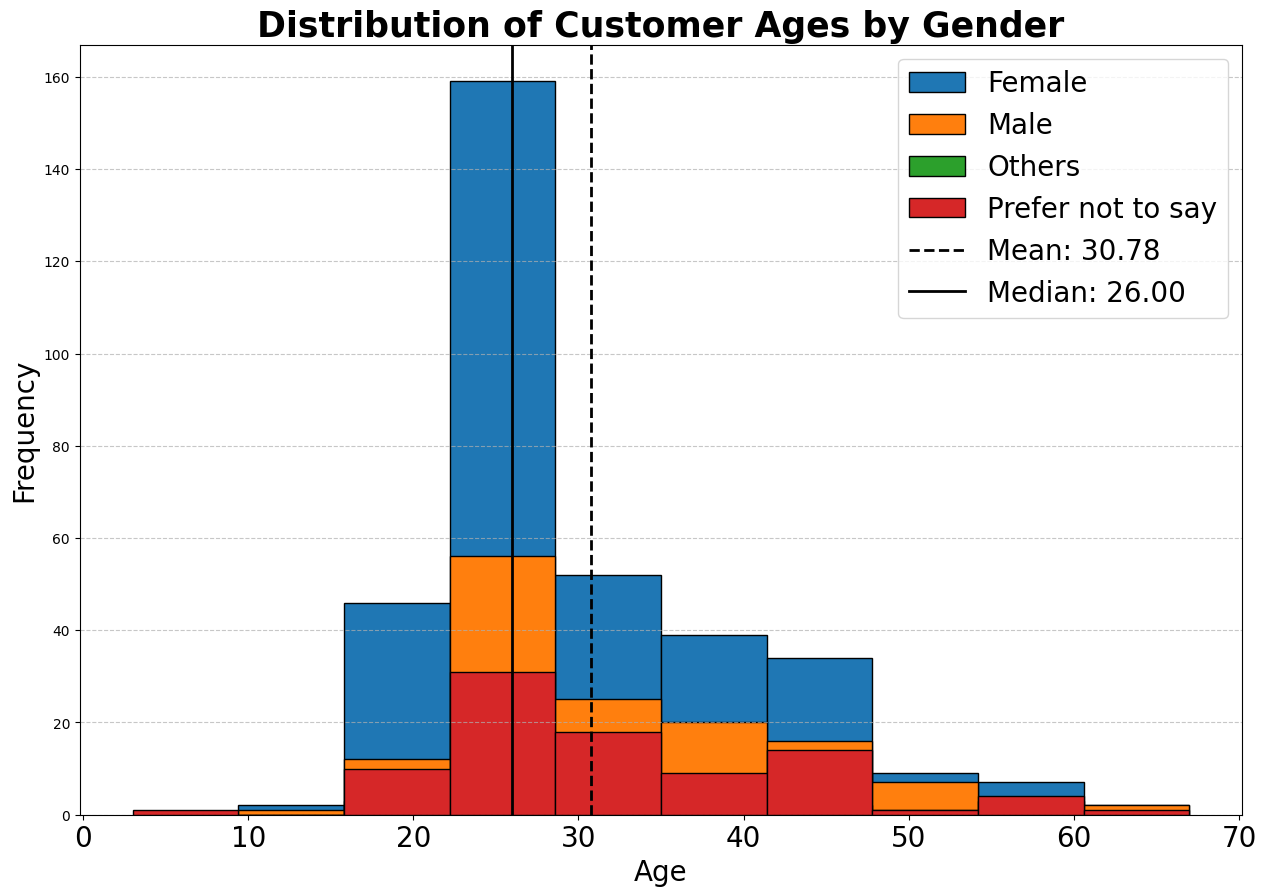

In [69]:
mean_age = np.mean(amazon_df["age"])
median_age = np.median(amazon_df["age"])

amazon_df.pivot(columns="Gender", values="age").plot.hist(
    edgecolor="black", figsize=(15, 10)
)
plt.title("Distribution of Customer Ages by Gender", fontsize=25, fontweight="bold")
plt.xlabel("Age", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
# Show grid for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.axvline(
    mean_age, color="black", linestyle="--", linewidth=2, label=f"Mean: {mean_age:.2f}"
)
plt.xticks(fontsize=20)
# add line for median
plt.axvline(
    median_age,
    color="black",
    linestyle="-",
    linewidth=2,
    label=f"Median: {median_age:.2f}",
)
plt.legend(fontsize=20)
plt.show()

/var/folders/bs/tlrmg2n164520pry59rs7fvh0000gn/T/ipykernel_52688/1417101202.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  amazon_df_exploded.groupby(["Purchase_Frequency", "Purchase_Categories"])


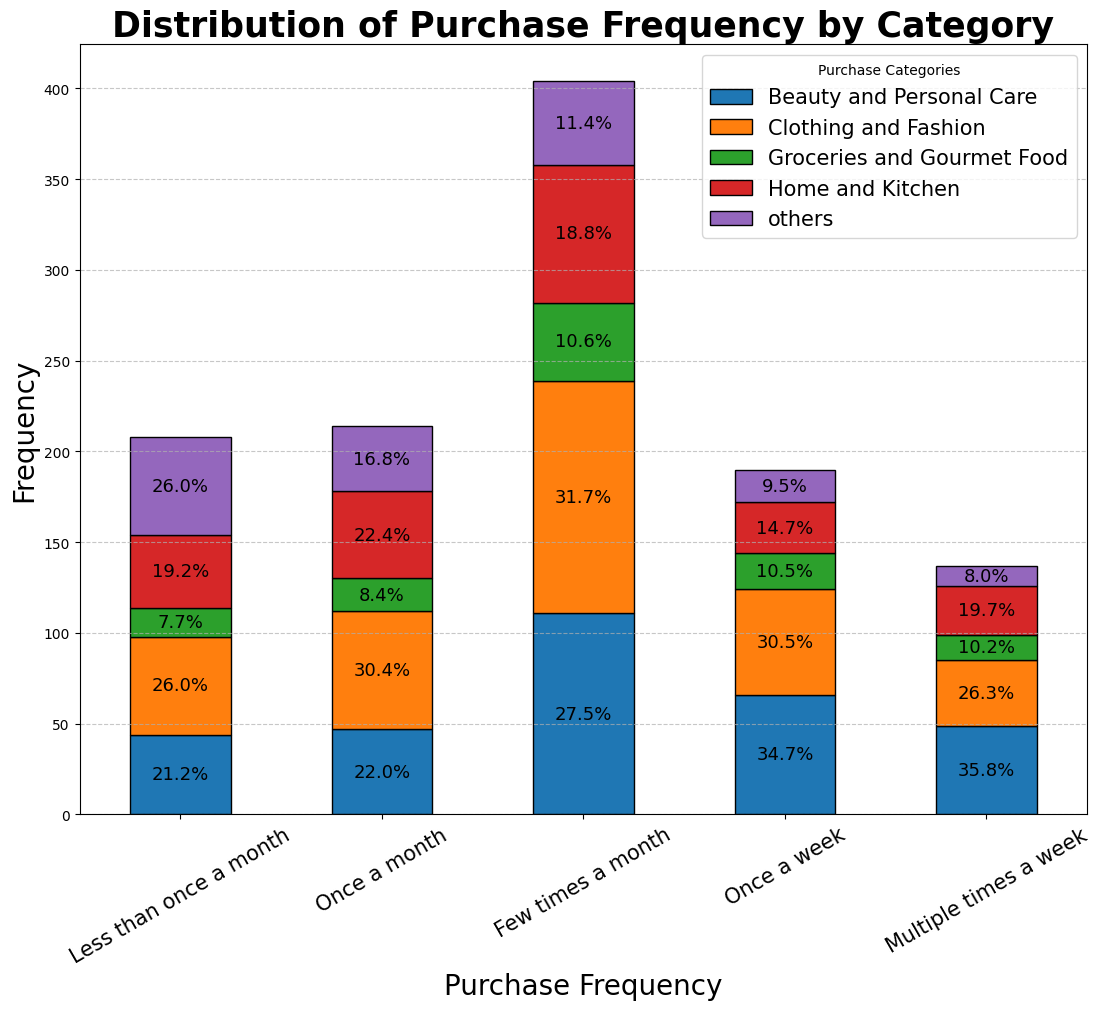

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the order you want for 'Purchase_Frequency'
frequency_order = [
    "Less than once a month",
    "Once a month",
    "Few times a month",
    "Once a week",
    "Multiple times a week",
]

# Step 1: Explode Purchase_Categories by splitting on ";"
amazon_df_exploded = amazon_df.assign(
    Purchase_Categories=amazon_df["Purchase_Categories"].str.split(";")
).explode("Purchase_Categories")

# Step 2: Convert 'Purchase_Frequency' to a categorical type with the specified order
amazon_df_exploded["Purchase_Frequency"] = pd.Categorical(
    amazon_df_exploded["Purchase_Frequency"], categories=frequency_order, ordered=True
)

# Step 3: Group by Purchase_Frequency and Purchase_Categories, then count each combination
category_counts = (
    amazon_df_exploded.groupby(["Purchase_Frequency", "Purchase_Categories"])
    .size()
    .unstack()
    .fillna(0)
)

# Step 4: Plot the stacked bar chart
plt.figure(figsize=(13, 10))
category_counts.plot(kind="bar", stacked=True, ax=plt.gca(), edgecolor="black")

# Customizing the plot
plt.title(
    "Distribution of Purchase Frequency by Category", fontsize=25, fontweight="bold"
)
plt.xlabel("Purchase Frequency", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=30, fontsize=15)

# Add percentage labels on top of each bar segment
for i, (index, row) in enumerate(category_counts.iterrows()):
    total = row.sum()
    cumulative = 0
    for j, (category, count) in enumerate(row.items()):
        if count > 0:
            percent = (count / total) * 100
            plt.text(
                i,
                cumulative + count / 2,
                f"{percent:.1f}%",
                ha="center",
                va="center",
                fontsize=13,
            )
            cumulative += count

# Show legend with category labels
plt.legend(title="Purchase Categories", fontsize=15)
plt.show()

Text(0.5, 1.0, 'Customer Gender Distribution')

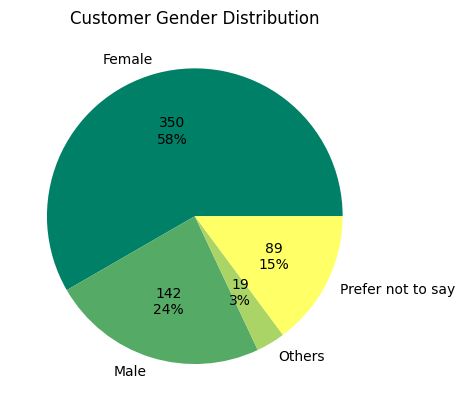

In [71]:
def label_function(val):
    return f"{val / 100 * len(amazon_df):.0f}\n{val:.0f}%"


amazon_df.groupby("Gender").size().plot(
    kind="pie", autopct=label_function, colormap="summer"
)
plt.title("Customer Gender Distribution")

Text(0.5, 1.0, 'Purchase Category Distribution')

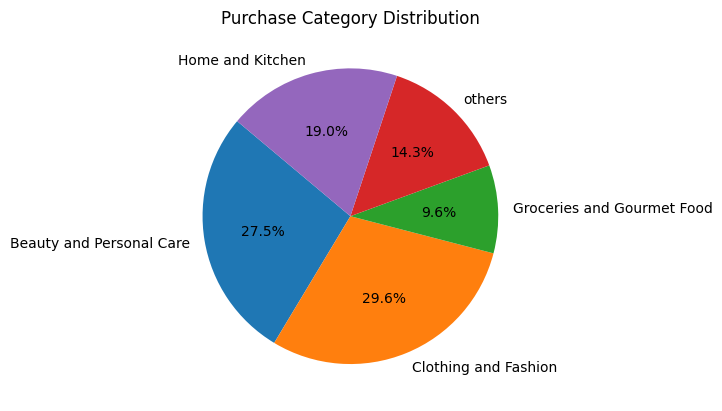

In [72]:
purchaseCategories = amazon_df["Purchase_Categories"].str.split(";").sum()
categoryCounts = Counter(purchaseCategories)

labels = list(categoryCounts.keys())
sizes = list(categoryCounts.values())
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=140)
plt.title("Purchase Category Distribution")

# Exploratory Data Analysis

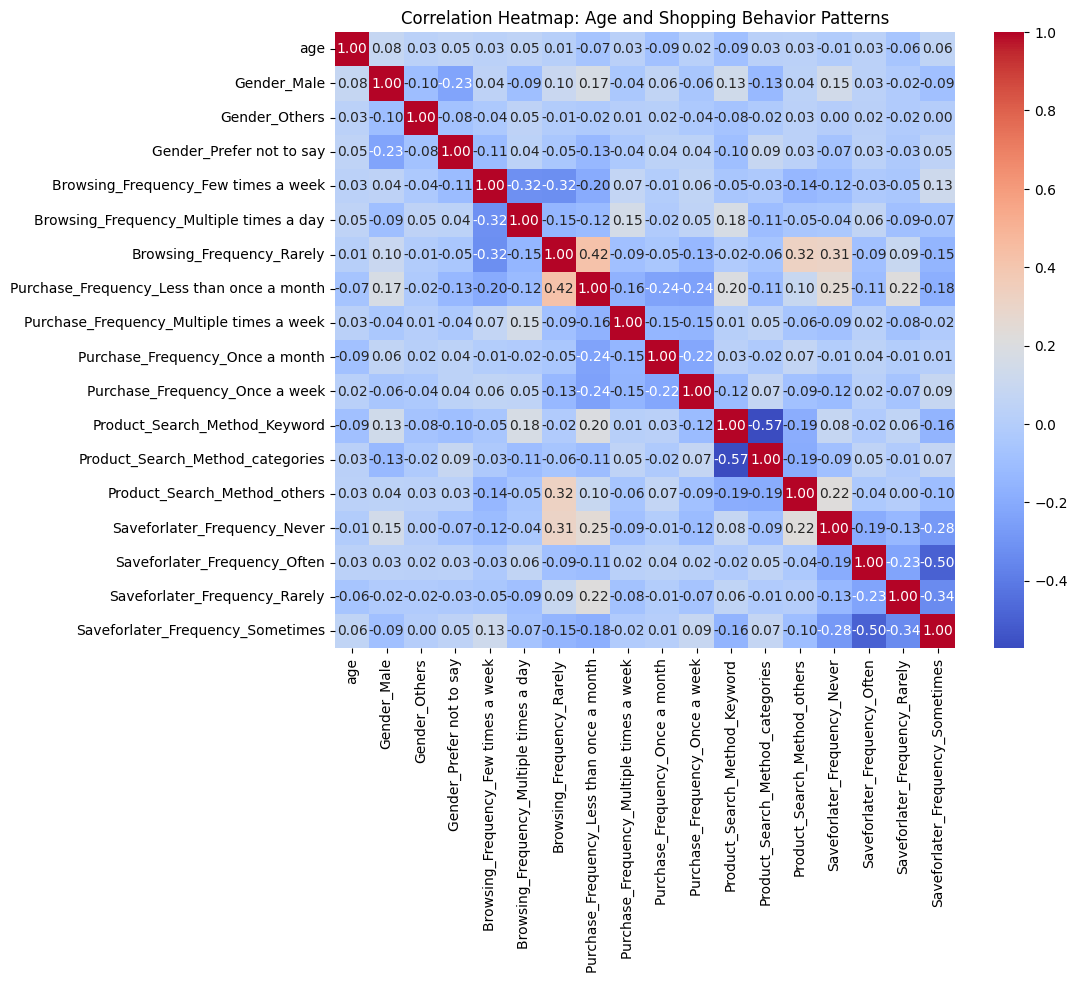

In [73]:
# Select relevant columns
columns_of_interest = [
    "age",
    "Gender",
    "Browsing_Frequency",
    "Purchase_Frequency",
    "Product_Search_Method",
    "Saveforlater_Frequency",
]
subset_df = amazon_df[columns_of_interest]

# Ensure all relevant columns are numerical
# You might need to encode categorical variables before correlation
# Example: Convert categorical column 'Product_Search_Method' to numeric using one-hot encoding

subset_df = pd.get_dummies(
    subset_df,
    columns=[
        "Gender",
        "Browsing_Frequency",
        "Purchase_Frequency",
        "Product_Search_Method",
        "Saveforlater_Frequency",
    ],
    drop_first=True,
)
# Calculate correlation matrix
correlation_matrix = subset_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap: Age and Shopping Behavior Patterns")
plt.show()

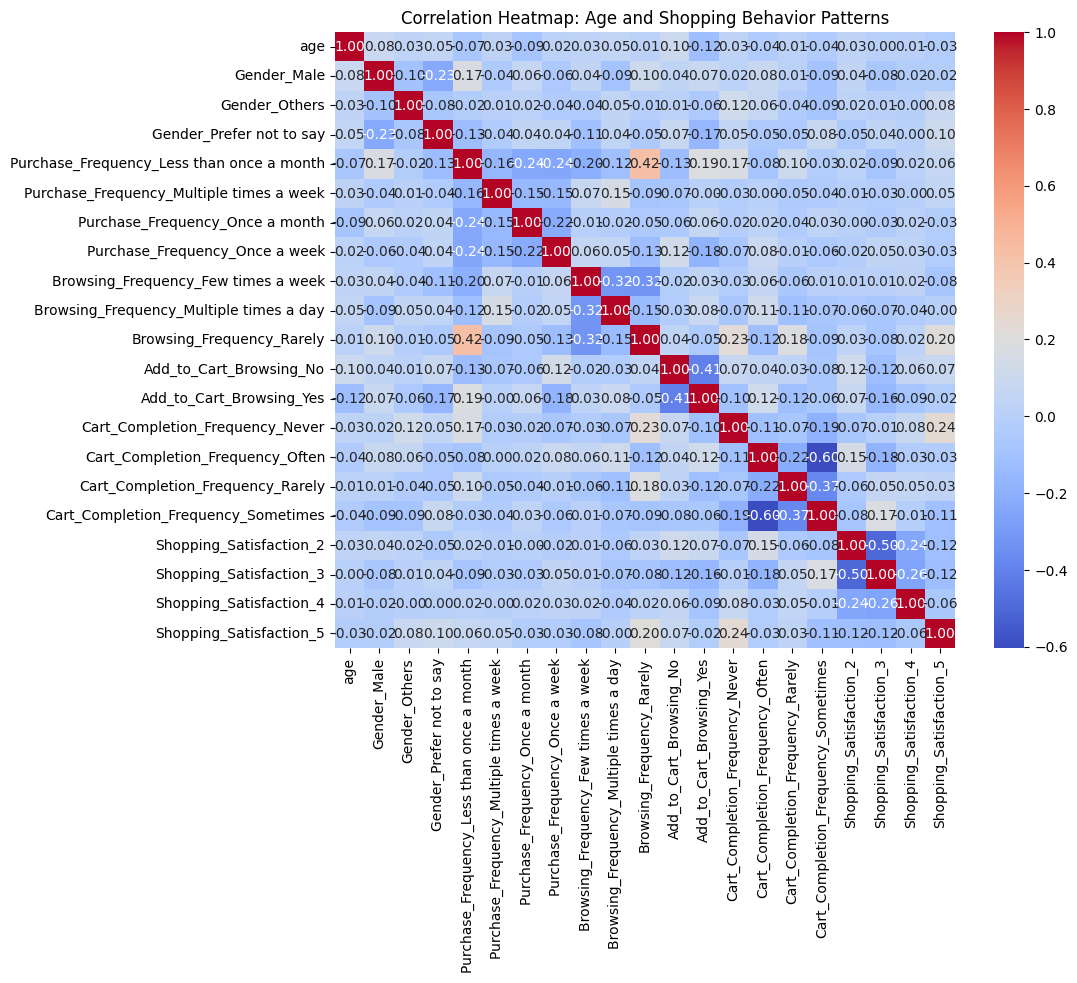

In [74]:
# Select relevant columns
columns_of_interest2 = [
    "age",
    "Gender",
    "Purchase_Frequency",
    "Browsing_Frequency",
    "Add_to_Cart_Browsing",
    "Cart_Completion_Frequency",
    "Shopping_Satisfaction",
]
subset_df2 = amazon_df[columns_of_interest2]

# Ensure all relevant columns are numerical by encoding categorical variables
subset_df2 = pd.get_dummies(
    subset_df2,
    columns=[
        "Gender",
        "Purchase_Frequency",
        "Browsing_Frequency",
        "Add_to_Cart_Browsing",
        "Cart_Completion_Frequency",
        "Shopping_Satisfaction",
    ],
    drop_first=True,
)

# Calculate correlation matrix
correlation_matrix2 = subset_df2.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix2, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap: Age and Shopping Behavior Patterns")
plt.show()

In [75]:
# lets just focus on young women?
youngwomen_df = amazon_df[amazon_df["age"] < 33]
youngwomen_df = youngwomen_df[youngwomen_df["Gender"] == "Female"]

youngwomen_df.sample(10)
len(youngwomen_df)

225

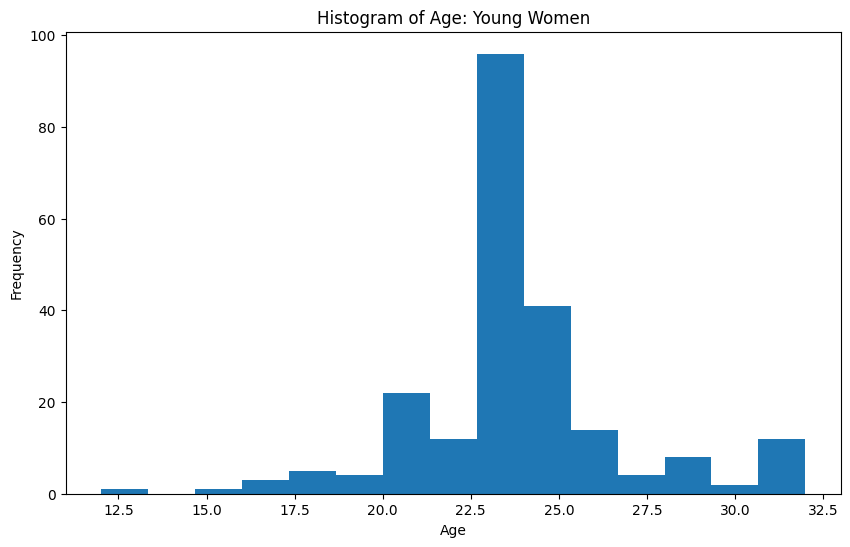

In [76]:
plt.figure(figsize=(10, 6))
plt.hist(youngwomen_df["age"], bins=15)
plt.title("Histogram of Age: Young Women")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

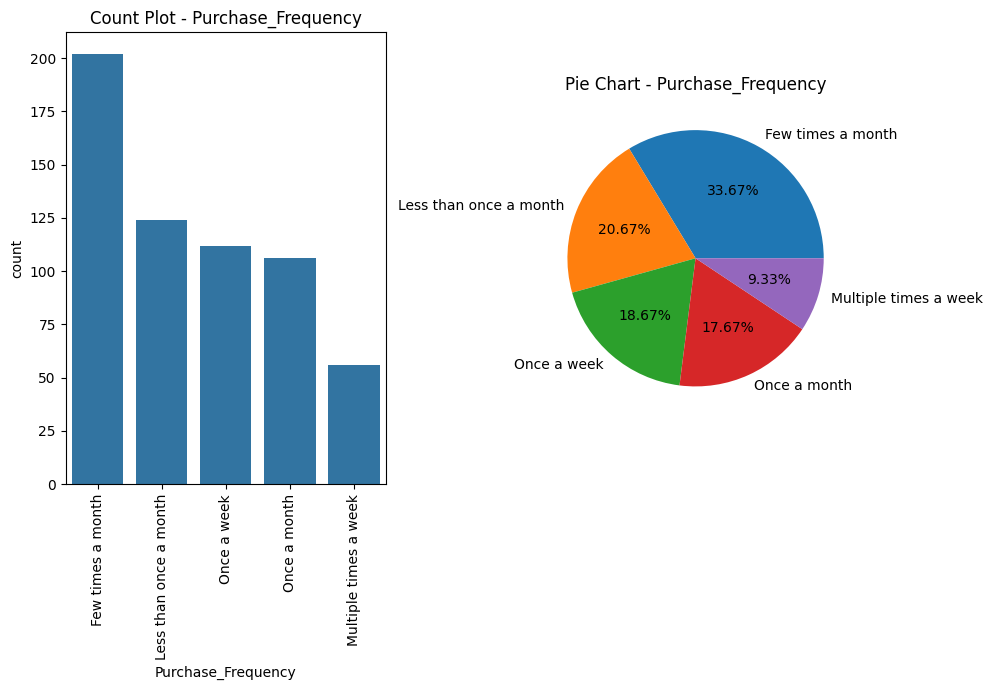

In [77]:
variable = "Purchase_Frequency"
plt.figure(figsize=(10, 7))
# Count plot
plt.subplot(1, 2, 1)
sns.countplot(
    x=variable, data=amazon_df, order=amazon_df[variable].value_counts().index
)
plt.title(f"Count Plot - {variable}")
plt.xticks(rotation=90)

# Pie Chart
plt.subplot(1, 2, 2)
counts = amazon_df[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct="%0.2f%%")
plt.title(f"Pie Chart - {variable}")


plt.tight_layout()
plt.show()

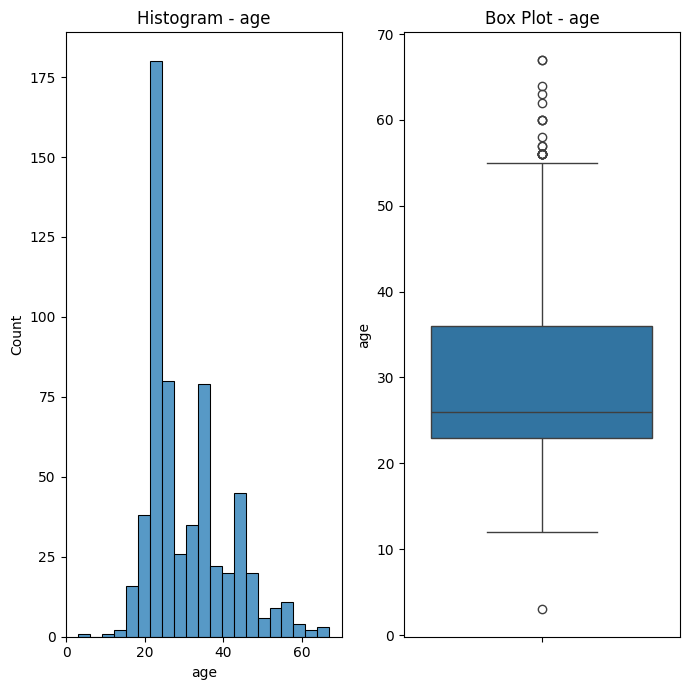

In [78]:
variable = "age"
plt.figure(figsize=(7, 7))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(x=variable, data=amazon_df)
plt.title(f"Histogram - {variable}")

# box plot
plt.subplot(1, 2, 2)
sns.boxplot(y=variable, data=amazon_df)
plt.title(f"Box Plot - {variable}")


plt.tight_layout()
plt.show()

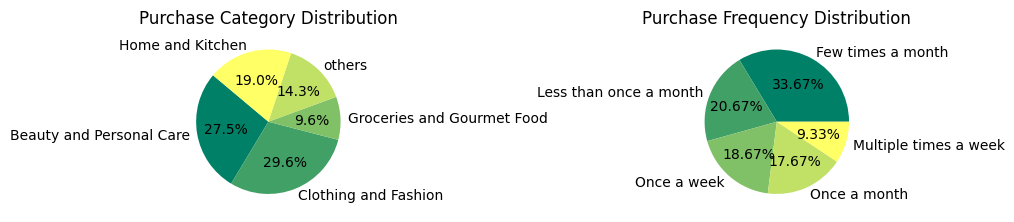

In [79]:
variable1 = "Purchase_Frequency"

plt.figure(figsize=(10, 7))

# Generate colors from a colormap for the first pie chart
n_colors1 = len(Counter(amazon_df["Purchase_Categories"].str.split(";").sum()))
colors1 = cm.summer(np.linspace(0, 1, n_colors1))

# Count plot
plt.subplot(1, 2, 1)
purchaseCategories = amazon_df["Purchase_Categories"].str.split(";").sum()
categoryCounts = Counter(purchaseCategories)
labels = list(categoryCounts.keys())
sizes = list(categoryCounts.values())
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=140, colors=colors1)
plt.title("Purchase Category Distribution")

# Generate colors from a colormap for the second pie chart
n_colors2 = len(amazon_df[variable1].value_counts())
colors2 = cm.summer(np.linspace(0, 1, n_colors2))

# Pie Chart
plt.subplot(1, 2, 2)
counts = amazon_df[variable1].value_counts()
plt.pie(counts, labels=counts.index, autopct="%0.2f%%", colors=colors2)
plt.title(f"Purchase Frequency Distribution")

plt.tight_layout()
plt.show()

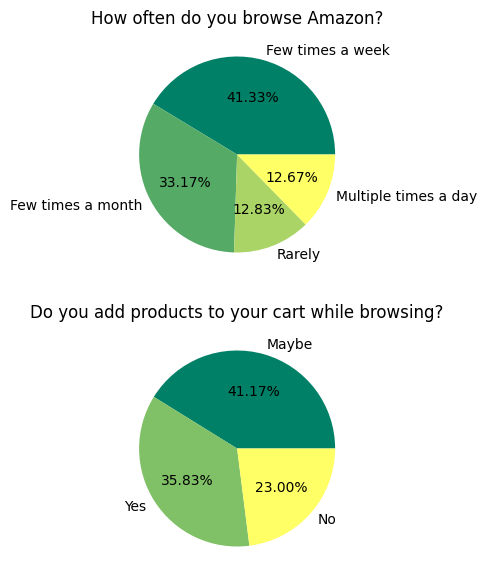

In [80]:
# BROWSING
variable1 = "Browsing_Frequency"
# Generate colors from a colormap for the first pie chart
n_colors1 = len(Counter(amazon_df["Add_to_Cart_Browsing"].str.split(";").sum()))
colors1 = cm.summer(np.linspace(0, 1, n_colors1))

plt.figure(figsize=(7, 7))
# Count plot
plt.subplot(2, 1, 2)
counts = amazon_df["Add_to_Cart_Browsing"].value_counts()
plt.pie(counts, labels=counts.index, autopct="%0.2f%%", colors=colors1)
plt.title(f"Do you add products to your cart while browsing?")

# Generate colors from a colormap for the second pie chart
n_colors2 = len(amazon_df[variable1].value_counts())
colors2 = cm.summer(np.linspace(0, 1, n_colors2))
# Pie Chart
plt.subplot(2, 1, 1)
counts = amazon_df[variable1].value_counts()
plt.pie(counts, labels=counts.index, autopct="%0.2f%%", colors=colors2)
plt.title(f"How often do you browse Amazon?")


plt.show()

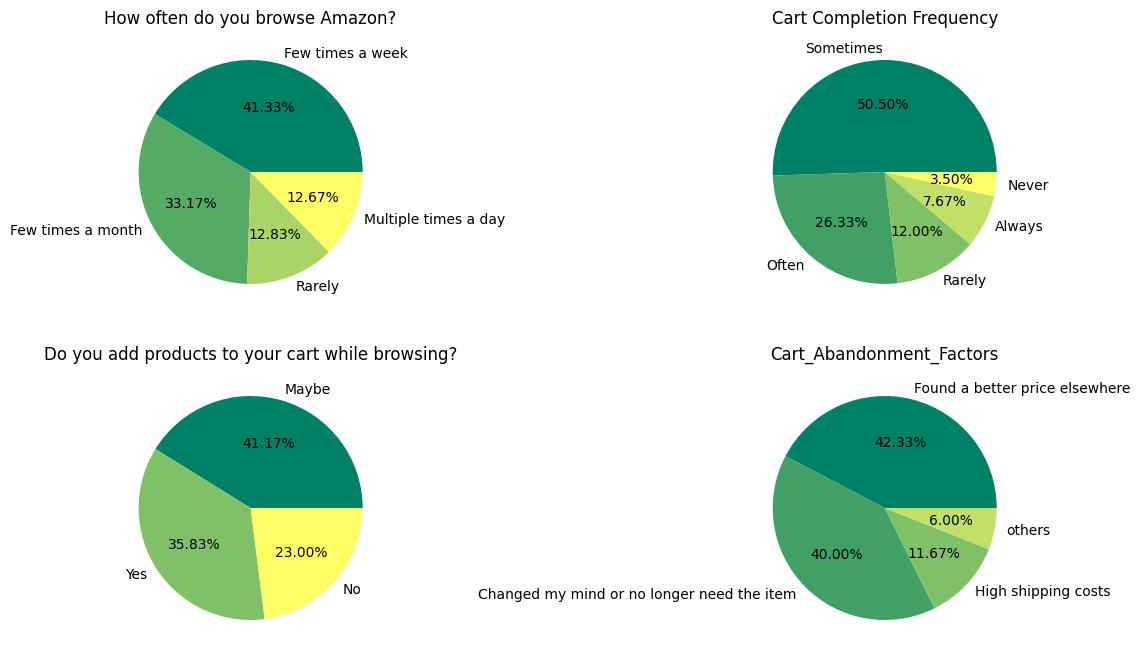

<Figure size 700x700 with 0 Axes>

In [81]:
fig, axes = plt.subplots(2, 2, figsize=(15, 8))

# BROWSING
variable1 = "Browsing_Frequency"
# Generate colors from a colormap for the first pie chart
n_colors1 = len(Counter(amazon_df["Add_to_Cart_Browsing"].str.split(";").sum()))
colors1 = cm.summer(np.linspace(0, 1, n_colors1))

plt.figure(figsize=(7, 7))
# Count plot
counts = amazon_df["Add_to_Cart_Browsing"].value_counts()
axes[1, 0].pie(counts, labels=counts.index, autopct="%0.2f%%", colors=colors1)
axes[1, 0].set_title(f"Do you add products to your cart while browsing?")

# Generate colors from a colormap for the second pie chart
n_colors2 = len(amazon_df[variable1].value_counts())
colors2 = cm.summer(np.linspace(0, 1, n_colors2))
# Pie Chart

counts = amazon_df[variable1].value_counts()
axes[0, 0].pie(counts, labels=counts.index, autopct="%0.2f%%", colors=colors2)
axes[0, 0].set_title(f"How often do you browse Amazon?")

# PLOT 3
# Generate colors from a colormap for the second pie chart
n_colors3 = len(amazon_df["Cart_Completion_Frequency"].value_counts())
colors3 = cm.summer(np.linspace(0, 1, n_colors3))
# Pie Chart
counts = amazon_df["Cart_Completion_Frequency"].value_counts()
axes[0, 1].pie(counts, labels=counts.index, autopct="%0.2f%%", colors=colors3)
axes[0, 1].set_title(f"Cart Completion Frequency")


# PLOT 4
# Generate colors from a colormap for the second pie chart
n_colors4 = len(amazon_df["Cart_Abandonment_Factors"].value_counts())
colors4 = cm.summer(np.linspace(0, 1, n_colors4))
# Pie Chart
counts = amazon_df["Cart_Abandonment_Factors"].value_counts()
axes[1, 1].pie(counts, labels=counts.index, autopct="%0.2f%%", colors=colors3)
axes[1, 1].set_title(f"Cart_Abandonment_Factors")
plt.show()

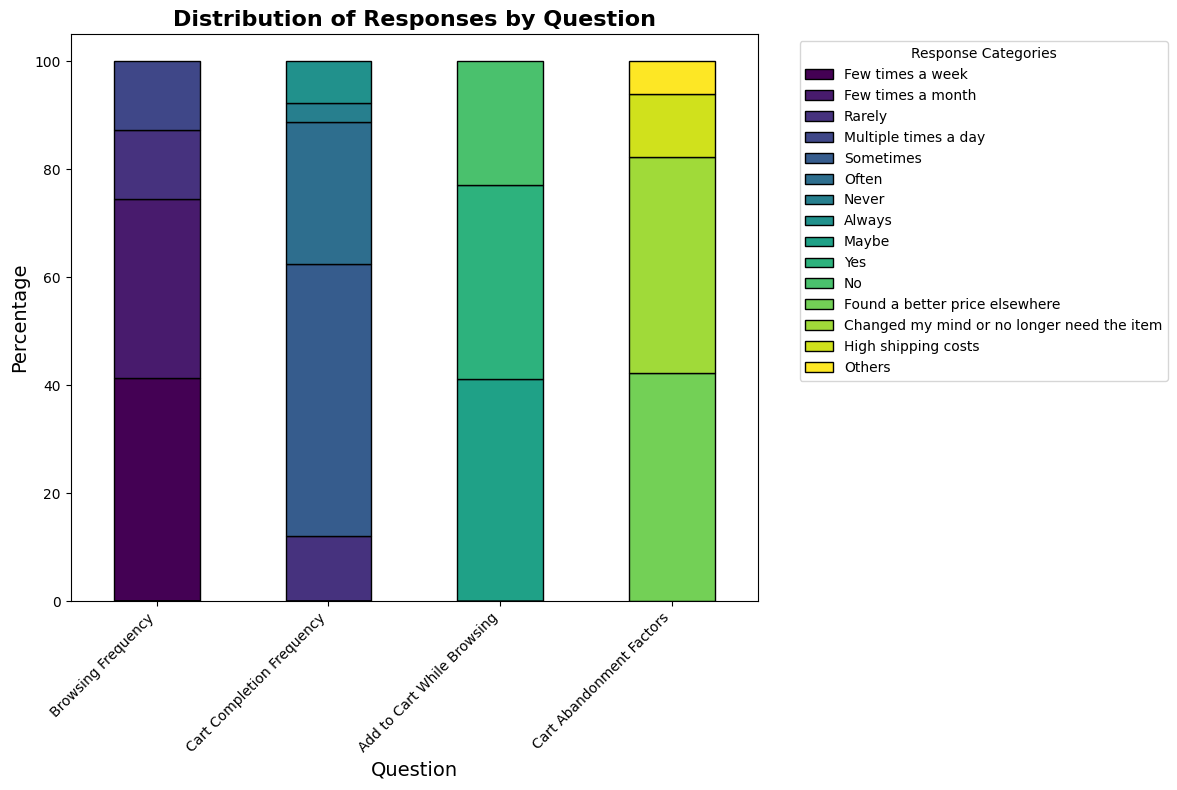

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame with the data provided
data = {
    "Question": [
        "Browsing Frequency",
        "Cart Completion Frequency",
        "Add to Cart While Browsing",
        "Cart Abandonment Factors",
    ],
    "Few times a week": [248, 0, 0, 0],
    "Few times a month": [199, 0, 0, 0],
    "Rarely": [77, 72, 0, 0],
    "Multiple times a day": [76, 0, 0, 0],
    "Sometimes": [0, 303, 0, 0],
    "Often": [0, 158, 0, 0],
    "Never": [0, 21, 0, 0],
    "Always": [0, 46, 0, 0],
    "Maybe": [0, 0, 247, 0],
    "Yes": [0, 0, 215, 0],
    "No": [0, 0, 138, 0],
    "Found a better price elsewhere": [0, 0, 0, 254],
    "Changed my mind or no longer need the item": [0, 0, 0, 240],
    "High shipping costs": [0, 0, 0, 70],
    "Others": [0, 0, 0, 36],
}

df = pd.DataFrame(data)
df.set_index("Question", inplace=True)

# Normalize data to percentages for a 100% stacked bar chart
df_percent = df.div(df.sum(axis=1), axis=0) * 100

# Plot 100% stacked bar chart
fig, ax = plt.subplots(figsize=(12, 8))
df_percent.plot(kind="bar", stacked=True, ax=ax, colormap="viridis", edgecolor="black")

# Customize the plot
plt.title("Distribution of Responses by Question", fontsize=16, fontweight="bold")
plt.xlabel("Question", fontsize=14)
plt.ylabel("Percentage", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.legend(
    title="Response Categories", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=10
)
plt.tight_layout()

# Display the plot
plt.show()

In [83]:
amazon_df["Saveforlater_Frequency"].value_counts()

Saveforlater_Frequency
Sometimes    251
Often        154
Rarely        82
Never         59
Always        54
Name: count, dtype: int64

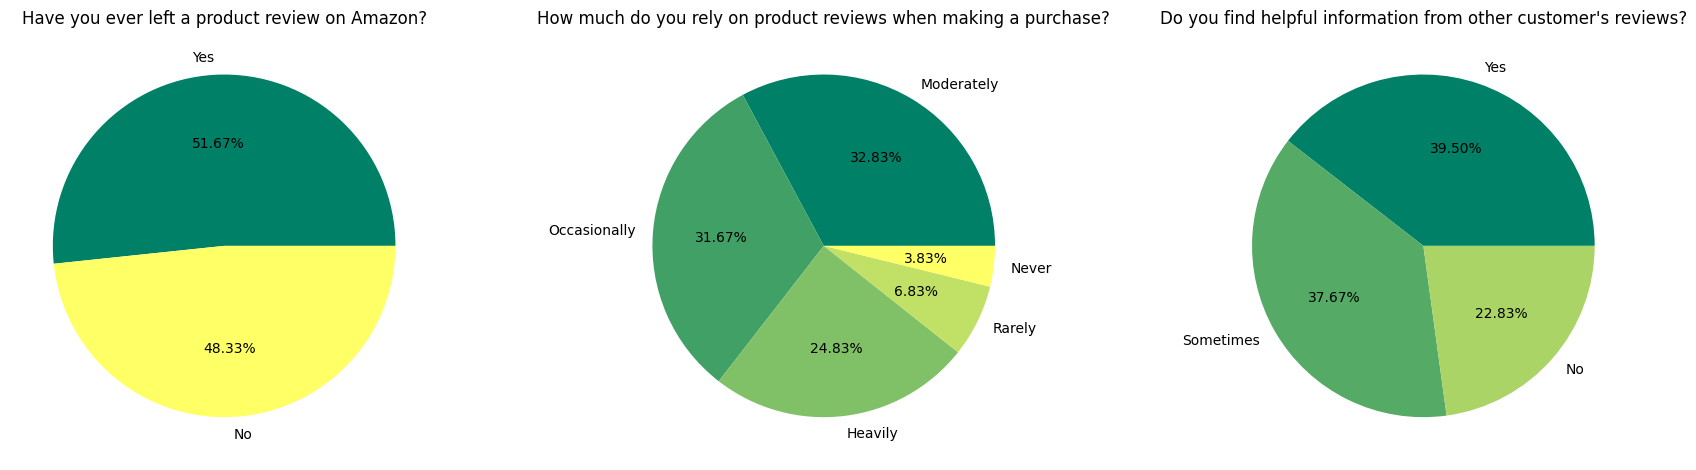

In [84]:
# REVIEWS

plt.figure(figsize=(21, 7))

# Generate colors from a colormap for the second pie chart
n_colors2 = len(amazon_df["Review_Left"].value_counts())
colors2 = cm.summer(np.linspace(0, 1, n_colors2))
plt.subplot(1, 3, 1)
counts = amazon_df["Review_Left"].value_counts()
plt.pie(counts, labels=counts.index, autopct="%0.2f%%", colors=colors2)
plt.title(f"Have you ever left a product review on Amazon?")


# Generate colors from a colormap for the second pie chart
n_colors3 = len(amazon_df["Review_Reliability"].value_counts())
colors2 = cm.summer(np.linspace(0, 1, n_colors3))
plt.subplot(1, 3, 2)
counts = amazon_df["Review_Reliability"].value_counts()
plt.pie(counts, labels=counts.index, autopct="%0.2f%%", colors=colors3)
plt.title(f"How much do you rely on product reviews when making a purchase?")


n_colors4 = len(amazon_df["Review_Helpfulness"].value_counts())
colors2 = cm.summer(np.linspace(0, 1, n_colors4))
plt.subplot(1, 3, 3)
counts = amazon_df["Review_Helpfulness"].value_counts()
plt.pie(counts, labels=counts.index, autopct="%0.2f%%", colors=colors4)
plt.title(f"Do you find helpful information from other customer's reviews?")

plt.subplots_adjust(wspace=0.4)
plt.show()

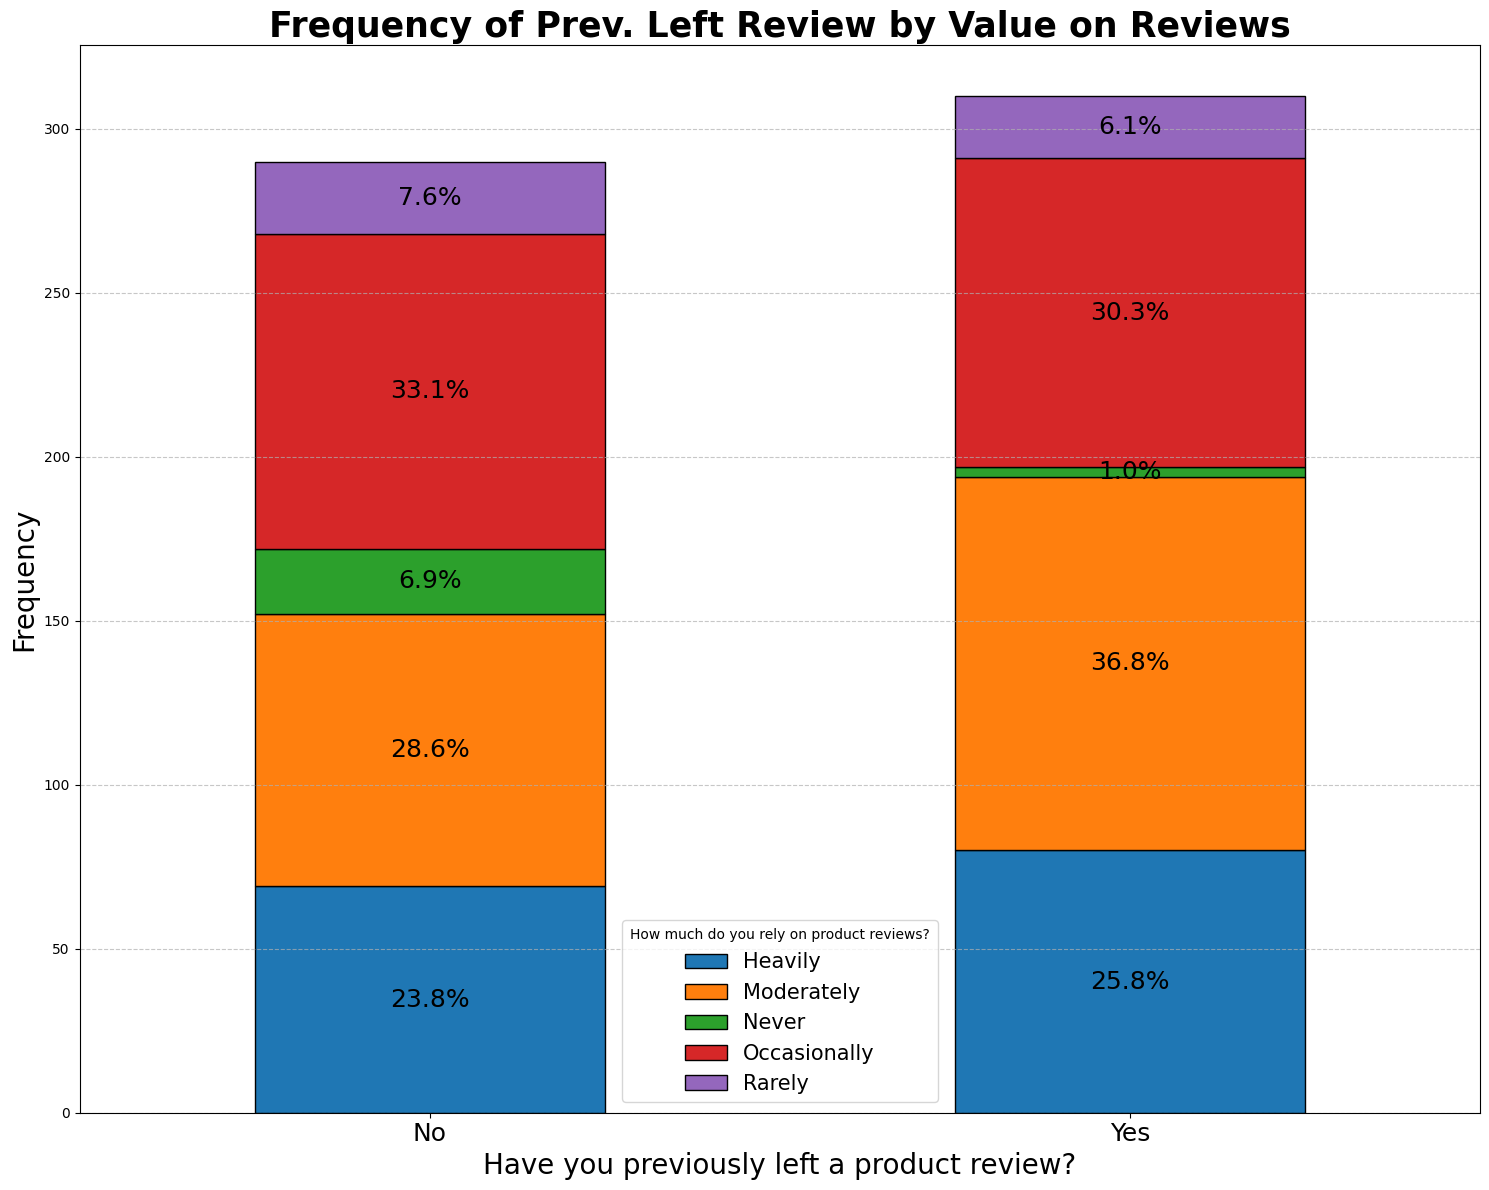

In [85]:
# Step 1: Group by Review_Reliability and Review_left, then count each combination
review_counts = (
    amazon_df.groupby(["Review_Left", "Review_Reliability"])
    .size()
    .unstack(fill_value=0)
)

# Step 2: Plot the stacked bar chart
plt.figure(figsize=(15, 12))
review_counts.plot(kind="bar", stacked=True, ax=plt.gca(), edgecolor="black")

# Customizing the plot
plt.title(
    "Frequency of Prev. Left Review by Value on Reviews", fontsize=25, fontweight="bold"
)
plt.xlabel("Have you previously left a product review?", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=0, fontsize=18)

# Add percentage labels on top of each bar segment
for i, (index, row) in enumerate(review_counts.iterrows()):
    total = row.sum()
    cumulative = 0
    for j, (review_left, count) in enumerate(row.items()):
        if count > 0:
            percent = (count / total) * 100
            plt.text(
                i,
                cumulative + count / 2,
                f"{percent:.1f}%",
                ha="center",
                va="center",
                fontsize=18,
            )
            cumulative += count

# Show legend with Review_left labels
plt.legend(
    title="How much do you rely on product reviews?",
    fontsize=15,
)
plt.tight_layout()  # Adjust layout for readability

# Show plot
plt.show()

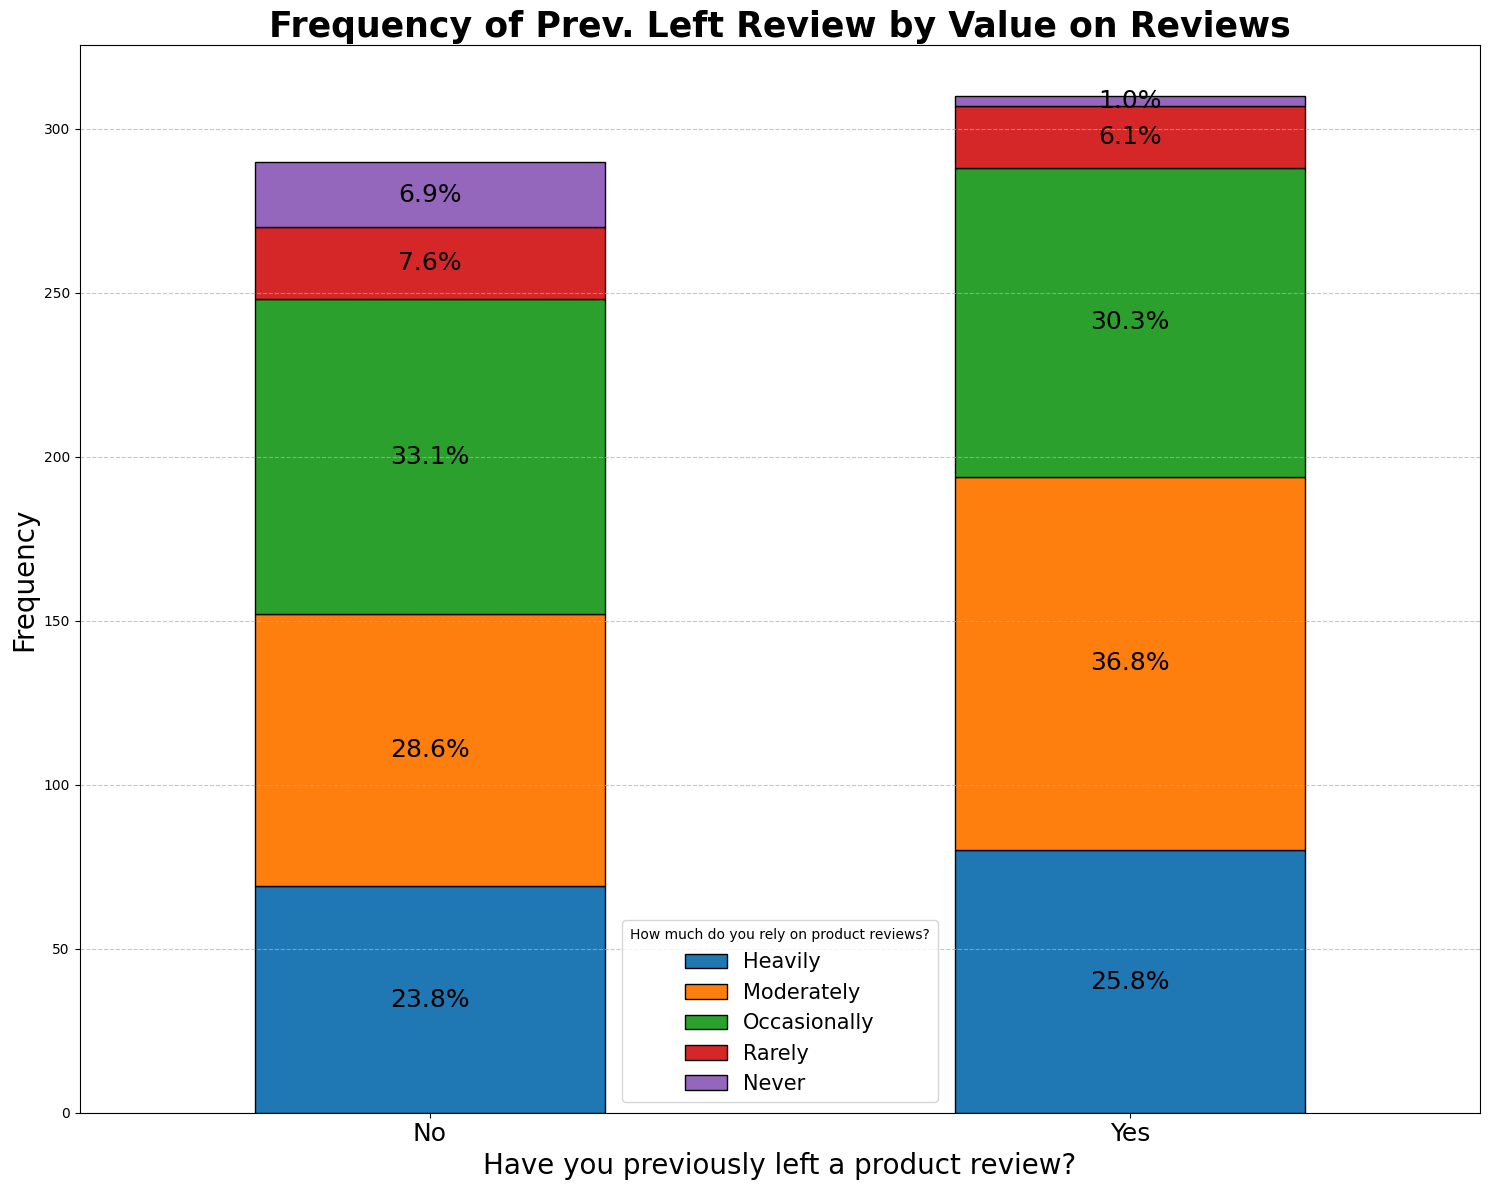

In [86]:
# Define the desired order for Review_Reliability
reliability_order = [
    "Heavily",
    "Moderately",
    "Occasionally",
    "Rarely",
    "Never",
]  # Replace these with your actual reliability levels in desired order
review_counts = review_counts[reliability_order]

# Step 2: Plot the stacked bar chart
plt.figure(figsize=(15, 12))
review_counts.plot(kind="bar", stacked=True, ax=plt.gca(), edgecolor="black")

# Customizing the plot
plt.title(
    "Frequency of Prev. Left Review by Value on Reviews", fontsize=25, fontweight="bold"
)
plt.xlabel("Have you previously left a product review?", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=0, fontsize=18)

# Add percentage labels on top of each bar segment
for i, (index, row) in enumerate(review_counts.iterrows()):
    total = row.sum()
    cumulative = 0
    for j, (review_left, count) in enumerate(row.items()):
        if count > 0:
            percent = (count / total) * 100
            plt.text(
                i,
                cumulative + count / 2,
                f"{percent:.1f}%",
                ha="center",
                va="center",
                fontsize=18,
            )
            cumulative += count

# Show legend with Review_Reliability labels
plt.legend(
    title="How much do you rely on product reviews?",
    fontsize=15,
)
plt.tight_layout()  # Adjust layout for readability

# Show plot
plt.show()

In [87]:
amazon_df["Personalized_Recommendation_Frequency"].value_counts()

Personalized_Recommendation_Frequency
No           250
Sometimes    228
Yes          122
Name: count, dtype: int64

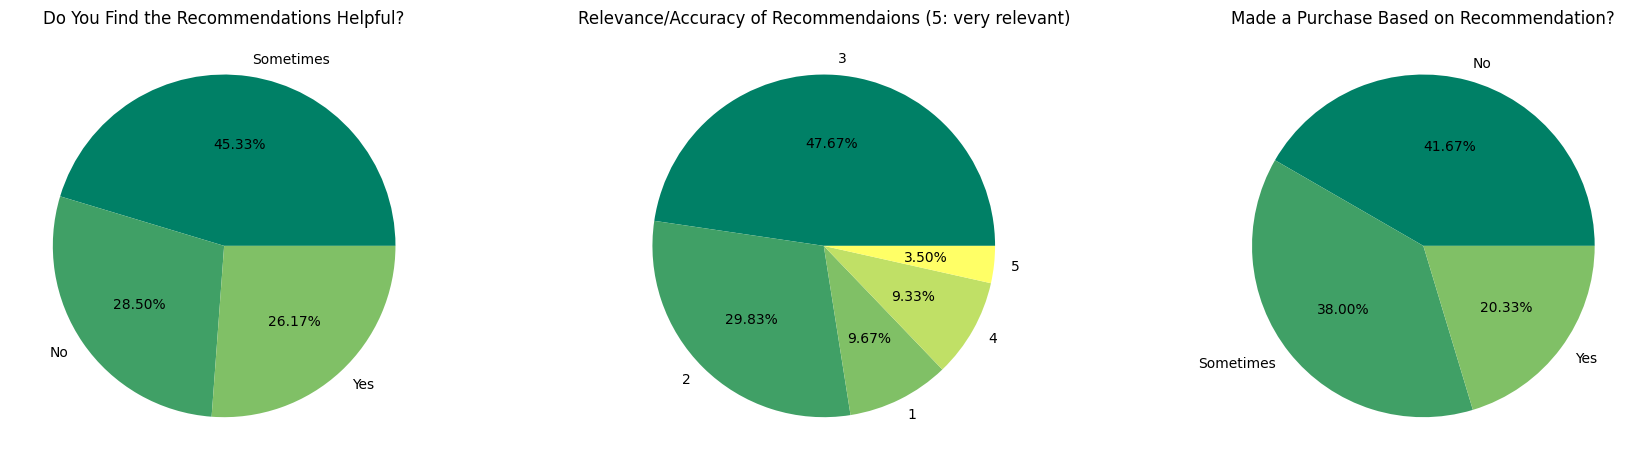

In [88]:
# RECCOMENDATIONS

plt.figure(figsize=(21, 7))

plt.subplot(1, 3, 3)
counts = amazon_df["Personalized_Recommendation_Frequency"].value_counts()
plt.pie(counts, labels=counts.index, autopct="%0.2f%%", colors=colors3)
plt.title(f"Made a Purchase Based on Recommendation?")

plt.subplot(1, 3, 1)
counts = amazon_df["Recommendation_Helpfulness"].value_counts()
plt.pie(counts, labels=counts.index, autopct="%0.2f%%", colors=colors3)
plt.title(f"Do You Find the Recommendations Helpful?")

plt.subplot(1, 3, 2)
counts = amazon_df["Rating_Accuracy "].value_counts()
plt.pie(counts, labels=counts.index, autopct="%0.2f%%", colors=colors3)
plt.title(f"Relevance/Accuracy of Recommendaions (5: very relevant)")

plt.subplots_adjust(wspace=0.4)
plt.show()

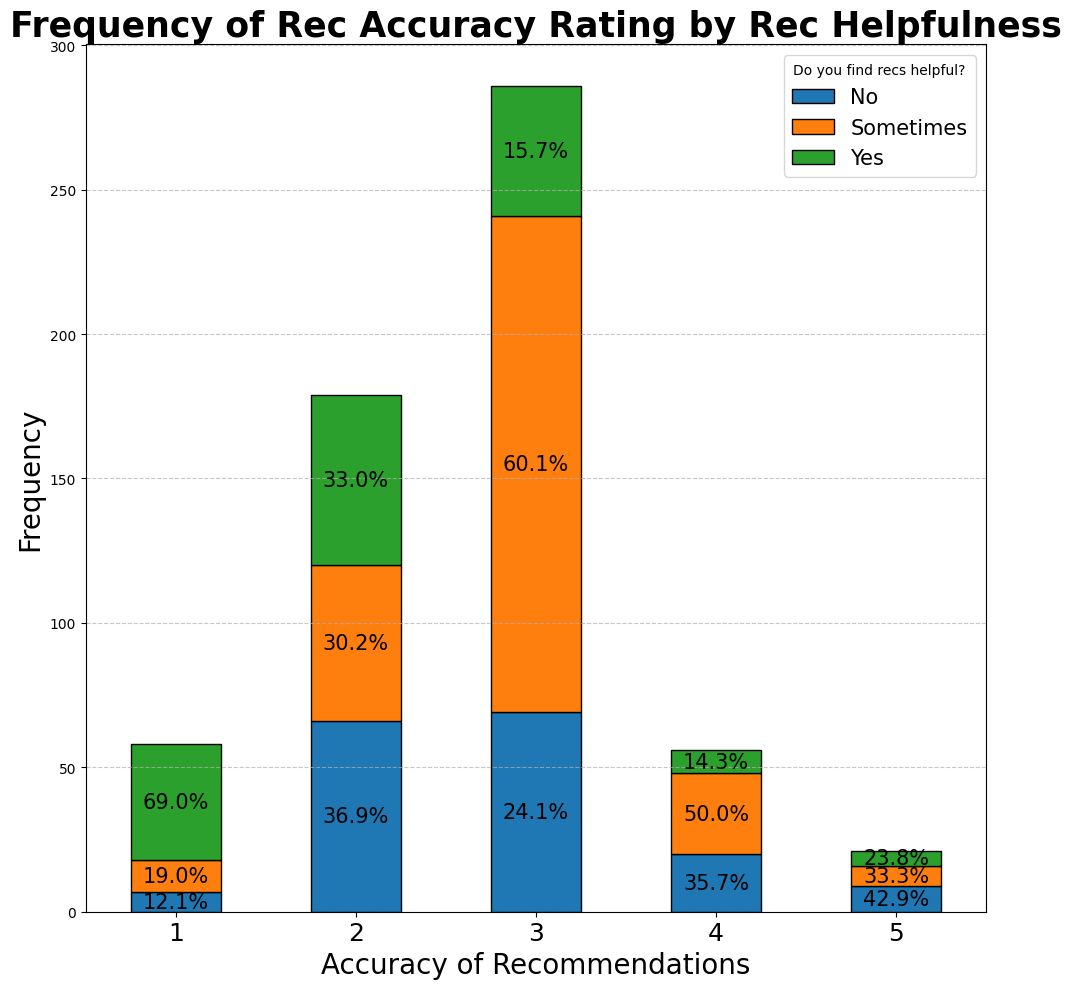

In [89]:
# Step 1: Group by Review_Reliability and Review_left, then count each combination
review_counts = (
    amazon_df.groupby(["Rating_Accuracy ", "Recommendation_Helpfulness"])
    .size()
    .unstack(fill_value=0)
)

# Step 2: Plot the stacked bar chart
plt.figure(figsize=(10, 10))
review_counts.plot(kind="bar", stacked=True, ax=plt.gca(), edgecolor="black")

# Customizing the plot
plt.title(
    "Frequency of Rec Accuracy Rating by Rec Helpfulness",
    fontsize=25,
    fontweight="bold",
)
plt.xlabel("Accuracy of Recommendations", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=0, fontsize=18)

# Add percentage labels on top of each bar segment
for i, (index, row) in enumerate(review_counts.iterrows()):
    total = row.sum()
    cumulative = 0
    for j, (review_left, count) in enumerate(row.items()):
        if count > 0:
            percent = (count / total) * 100
            plt.text(
                i,
                cumulative + count / 2,
                f"{percent:.1f}%",
                ha="center",
                va="center",
                fontsize=15,
            )
            cumulative += count

# Show legend with Review_left labels
plt.legend(
    title="Do you find recs helpful?",
    fontsize=15,
)
plt.tight_layout()  # Adjust layout for readability

# Show plot
plt.show()

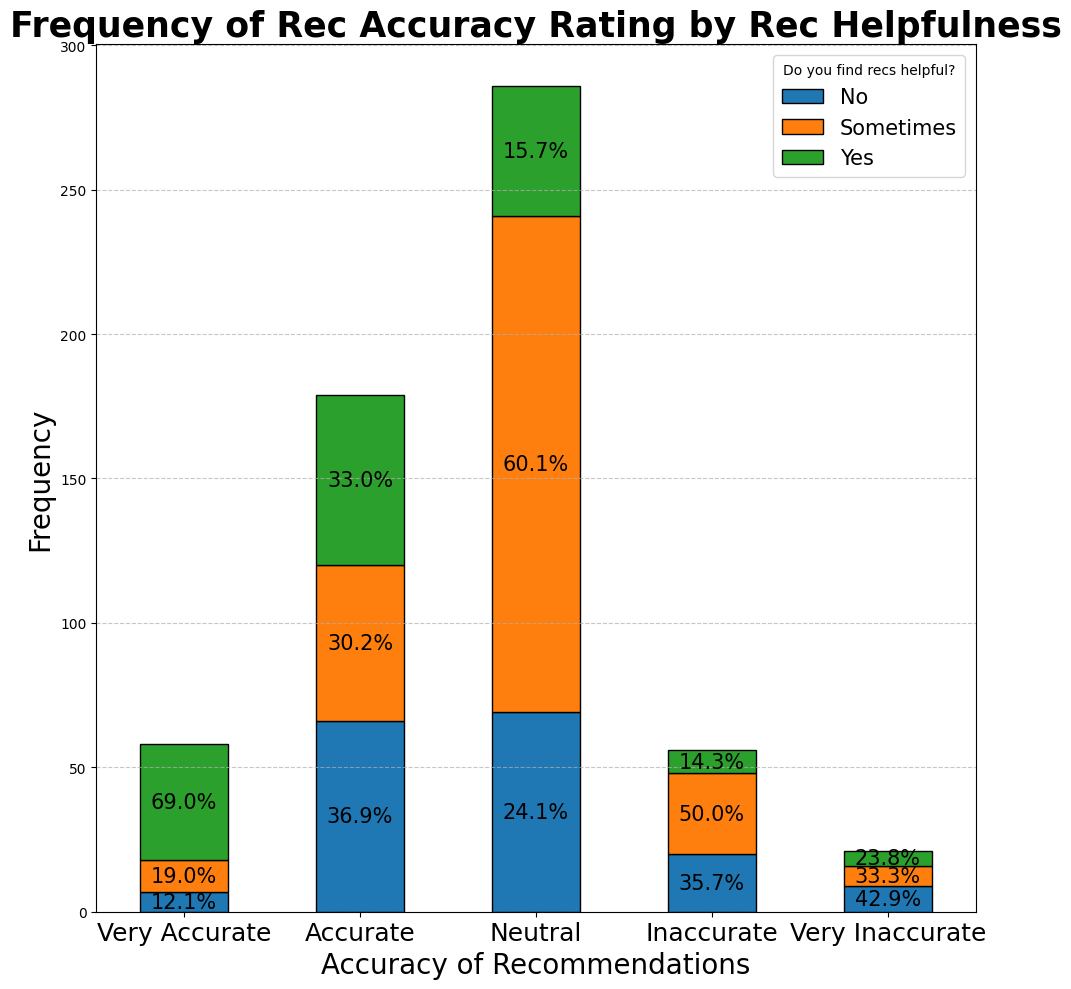

In [90]:
# Step 1: Group by Rating_Accuracy and Recommendation_Helpfulness, then count each combination
review_counts = (
    amazon_df.groupby(["Rating_Accuracy ", "Recommendation_Helpfulness"])
    .size()
    .unstack(fill_value=0)
)

# Step 2: Plot the stacked bar chart
plt.figure(figsize=(10, 10))
review_counts.plot(kind="bar", stacked=True, ax=plt.gca(), edgecolor="black")

# Customizing the plot
plt.title(
    "Frequency of Rec Accuracy Rating by Rec Helpfulness",
    fontsize=25,
    fontweight="bold",
)
plt.xlabel("Accuracy of Recommendations", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=0, fontsize=18)

# Custom x-tick labels
custom_labels = [
    "Very Accurate",
    "Accurate",
    "Neutral",
    "Inaccurate",
    "Very Inaccurate",
]
plt.xticks(ticks=range(len(custom_labels)), labels=custom_labels)

# Add percentage labels on top of each bar segment
for i, (index, row) in enumerate(review_counts.iterrows()):
    total = row.sum()
    cumulative = 0
    for j, (review_left, count) in enumerate(row.items()):
        if count > 0:
            percent = (count / total) * 100
            plt.text(
                i,
                cumulative + count / 2,
                f"{percent:.1f}%",
                ha="center",
                va="center",
                fontsize=15,
            )
            cumulative += count

# Show legend with Review_left labels
plt.legend(
    title="Do you find recs helpful?",
    fontsize=15,
)
plt.tight_layout()  # Adjust layout for readability

# Show plot
plt.show()

In [91]:
amazon_df.describe()

age  Customer_Reviews_Importance  \
count  600.000000                   600.000000   
mean    30.780000                     2.481667   
std     10.180914                     1.185470   
min      3.000000                     1.000000   
25%     23.000000                     1.000000   
50%     26.000000                     3.000000   
75%     36.000000                     3.000000   
max     67.000000                     5.000000   

       Personalized_Recommendation_Frequency   Rating_Accuracy   \
count                              600.000000        600.000000   
mean                                 2.700000          2.671667   
std                                  1.043303          0.901046   
min                                  1.000000          1.000000   
25%                                  2.000000          2.000000   
50%                                  3.000000          3.000000   
75%                                  3.000000          3.000000   
max                                  5.000000          5.000000   

       Shopping_Satisfaction  
count             600.000000  
mean                2.463333  
std                 1.013427  
min                 1.000000  
25%                 2.000000  
50%                 2.000000  
75%                 3.000000  
max                 5.000000

# SEGMENTATION

In [92]:
column_types = pd.DataFrame(amazon_df.dtypes).reset_index()
column_types.columns = ["Column Name", "Data Type"]
print(column_types)

                               Column Name Data Type
0                                      age     int64
1                                   Gender    object
2                       Purchase_Frequency    object
3                      Purchase_Categories    object
4    Personalized_Recommendation_Frequency    object
5                       Browsing_Frequency    object
6                    Product_Search_Method    object
7                Search_Result_Exploration    object
8              Customer_Reviews_Importance     int64
9                     Add_to_Cart_Browsing    object
10               Cart_Completion_Frequency    object
11                Cart_Abandonment_Factors    object
12                  Saveforlater_Frequency    object
13                             Review_Left    object
14                      Review_Reliability    object
15                      Review_Helpfulness    object
16  Personalized_Recommendation_Frequency      int64
17              Recommendation_Helpfulness    

In [93]:
# creating binary columns for purchase categories
purchaseCategories = amazon_df["Purchase_Categories"].str.split(";").sum()
print(list(set(purchaseCategories)))

amazon_df.loc[
    amazon_df["Purchase_Categories"].str.contains(
        "Home and Kitchen", case=False, na=False
    ),
    "Home_Kitchen",
] = 1
amazon_df.loc[
    amazon_df["Purchase_Categories"].str.contains(
        "Beauty and Personal Care", case=False, na=False
    ),
    "Beauty_PersonalCare",
] = 1
amazon_df.loc[
    amazon_df["Purchase_Categories"].str.contains(
        "Groceries and Gourmet Food", case=False, na=False
    ),
    "Groceries_GourmetFood",
] = 1
amazon_df.loc[
    amazon_df["Purchase_Categories"].str.contains(
        "Clothing and Fashion", case=False, na=False
    ),
    "Clothing_Fashion",
] = 1
amazon_df.loc[
    amazon_df["Purchase_Categories"].str.contains("others", case=False, na=False),
    "others",
] = 1


# Replace NaN values in 'ColumnName' with 0
amazon_df["Home_Kitchen"] = amazon_df["Home_Kitchen"].fillna(0)
amazon_df["Beauty_PersonalCare"] = amazon_df["Beauty_PersonalCare"].fillna(0)
amazon_df["Groceries_GourmetFood"] = amazon_df["Groceries_GourmetFood"].fillna(0)
amazon_df["Clothing_Fashion"] = amazon_df["Clothing_Fashion"].fillna(0)
amazon_df["others"] = amazon_df["others"].fillna(0)

amazon_df.sample(10)

['Beauty and Personal Care', 'Home and Kitchen', 'Clothing and Fashion', 'others', 'Groceries and Gourmet Food']


age             Gender Purchase_Frequency  \
308   25               Male  Few times a month   
131   35  Prefer not to say  Few times a month   
417   34             Female        Once a week   
108   24               Male       Once a month   
358   23             Female  Few times a month   
552   45             Female  Few times a month   
428   21             Female  Few times a month   
436   35             Female  Few times a month   
109   24             Female  Few times a month   
557   43               Male  Few times a month   

                                   Purchase_Categories  \
308              Clothing and Fashion;Home and Kitchen   
131  Beauty and Personal Care;Clothing and Fashion;...   
417                           Beauty and Personal Care   
108  Groceries and Gourmet Food;Beauty and Personal...   
358  Groceries and Gourmet Food;Beauty and Personal...   
552                               Clothing and Fashion   
428                           Beauty and Personal Care   
436              Clothing and Fashion;Home and Kitchen   
109                                             others   
557  Groceries and Gourmet Food;Beauty and Personal...   

    Personalized_Recommendation_Frequency    Browsing_Frequency  \
308                                    No  Multiple times a day   
131                                    No     Few times a month   
417                             Sometimes     Few times a month   
108                             Sometimes      Few times a week   
358                             Sometimes     Few times a month   
552                             Sometimes                Rarely   
428                             Sometimes     Few times a month   
436                             Sometimes     Few times a month   
109                                   Yes      Few times a week   
557                                    No      Few times a week   

    Product_Search_Method Search_Result_Exploration  \
308                Filter            Multiple pages   
131                Filter            Multiple pages   
417               Keyword            Multiple pages   
108               Keyword            Multiple pages   
358               Keyword            Multiple pages   
552            categories            Multiple pages   
428            categories            Multiple pages   
436            categories            Multiple pages   
109               Keyword            Multiple pages   
557                Filter            Multiple pages   

     Customer_Reviews_Importance Add_to_Cart_Browsing  ...  \
308                            3                   No  ...   
131                            3                   No  ...   
417                            4                Maybe  ...   
108                            1                  Yes  ...   
358                            1                  Yes  ...   
552                            3                   No  ...   
428                            3                Maybe  ...   
436                            4                Maybe  ...   
109                            1                  Yes  ...   
557                            2                   No  ...   

    Recommendation_Helpfulness Rating_Accuracy  Shopping_Satisfaction  \
308                         No                3                     3   
131                         No                3                     2   
417                         No                2                     2   
108                        Yes                2                     2   
358                         No                2                     1   
552                         No                2                     1   
428                  Sometimes                3                     3   
436                  Sometimes                3                     2   
109                        Yes                3                     2   
557                         No                2           

In [94]:
kmeans_cols = [
    "age",
    "Gender",
    "Purchase_Frequency",
    "Browsing_Frequency",
    "Customer_Reviews_Importance",
    "Add_to_Cart_Browsing",
    "Cart_Completion_Frequency",
    "Cart_Abandonment_Factors",
    "Home_Kitchen",
    "Beauty_PersonalCare",
    "Groceries_GourmetFood",
    "Clothing_Fashion",
    "others",
]

amazon_kmeans_df = amazon_df[kmeans_cols].copy()

amazon_kmeans_df.sample(10)

age             Gender      Purchase_Frequency    Browsing_Frequency  \
70    24             Female  Less than once a month     Few times a month   
420   24             Female       Few times a month  Multiple times a day   
94    34  Prefer not to say       Few times a month     Few times a month   
292   23             Female       Few times a month      Few times a week   
276   37             Female             Once a week      Few times a week   
21    23             Female            Once a month     Few times a month   
581   41             Female             Once a week      Few times a week   
121   27               Male            Once a month     Few times a month   
169   17               Male       Few times a month      Few times a week   
209   35               Male            Once a month      Few times a week   

     Customer_Reviews_Importance Add_to_Cart_Browsing  \
70                             1                  Yes   
420                            2                  Yes   
94                             3                Maybe   
292                            3                  Yes   
276                            2                  Yes   
21                             1                  Yes   
581                            3                Maybe   
121                            3                  Yes   
169                            3                Maybe   
209                            3                  Yes   

    Cart_Completion_Frequency                    Cart_Abandonment_Factors  \
70                      Often  Changed my mind or no longer need the item   
420                 Sometimes  Changed my mind or no longer need the item   
94                  Sometimes              Found a better price elsewhere   
292                    Rarely  Changed my mind or no longer need the item   
276                    Always              Found a better price elsewhere   
21                  Sometimes              Found a better price elsewhere   
581                 Sometimes              Found a better price elsewhere   
121                 Sometimes  Changed my mind or no longer need the item   
169                     Never  Changed my mind or no longer need the item   
209                 Sometimes  Changed my mind or no longer need the item   

     Home_Kitchen  Beauty_PersonalCare  Groceries_GourmetFood  \
70            0.0                  1.0                    0.0   
420           1.0                  1.0                    1.0   
94            0.0                  1.0                    0.0   
292           0.0                  1.0                    0.0   
276           0.0                  1.0                    0.0   
21            0.0                  0.0                    0.0   
581           0.0                  1.0                    0.0   
121           0.0                  0.0                    0.0   
169           0.0                  1.0                    1.0   
209           0.0                  0.0                    0.0   

     Clothing_Fashion  others  
70                1.0     0.0  
420               1.0     1.0  
94                1.0     0.0  
292               0.0     0.0  
276               0.0     0.0  
21                1.0     0.0  
581               0.0     0.0  
121               0.0     1.0  
169               1.0     0.0  
209               1.0     0.0

In [95]:
column_types3 = pd.DataFrame(amazon_kmeans_df.dtypes).reset_index()
column_types3.columns = ["Column Name", "Data Type"]

print(column_types3)

                    Column Name Data Type
0                           age     int64
1                        Gender    object
2            Purchase_Frequency    object
3            Browsing_Frequency    object
4   Customer_Reviews_Importance     int64
5          Add_to_Cart_Browsing    object
6     Cart_Completion_Frequency    object
7      Cart_Abandonment_Factors    object
8                  Home_Kitchen   float64
9           Beauty_PersonalCare   float64
10        Groceries_GourmetFood   float64
11             Clothing_Fashion   float64
12                       others   float64


In [96]:
# one hot encoding of columns
column_transformer = ColumnTransformer(
    transformers=[
        ("onehot_gender", OneHotEncoder(), ["Gender"]),
        ("onehot_purchaseFreq", OneHotEncoder(), ["Purchase_Frequency"]),
        ("onehot_browsingFreq", OneHotEncoder(), ["Browsing_Frequency"]),
        ("onehot_reviewsImportance", OneHotEncoder(), ["Customer_Reviews_Importance"]),
        ("onehot_cartBrowsing", OneHotEncoder(), ["Add_to_Cart_Browsing"]),
        ("onehot_cartCompletion", OneHotEncoder(), ["Cart_Completion_Frequency"]),
        ("onehot_cartAbandon", OneHotEncoder(), ["Cart_Abandonment_Factors"]),
        ("onehot_CategoryHome", OneHotEncoder(), ["Home_Kitchen"]),
        ("onehot_CategoryBeauty", OneHotEncoder(), ["Beauty_PersonalCare"]),
        ("onehot_CategoryGroceries", OneHotEncoder(), ["Groceries_GourmetFood"]),
        ("onehot_CategoryFashion", OneHotEncoder(), ["Clothing_Fashion"]),
        ("onehot_CategoryOther", OneHotEncoder(), ["others"]),
    ],
    remainder="passthrough",
)

encoded_df = column_transformer.fit_transform(amazon_kmeans_df)

In [97]:
# standardize data
scaler = StandardScaler(with_mean=False)
scaled_survey_data = scaler.fit_transform(encoded_df)

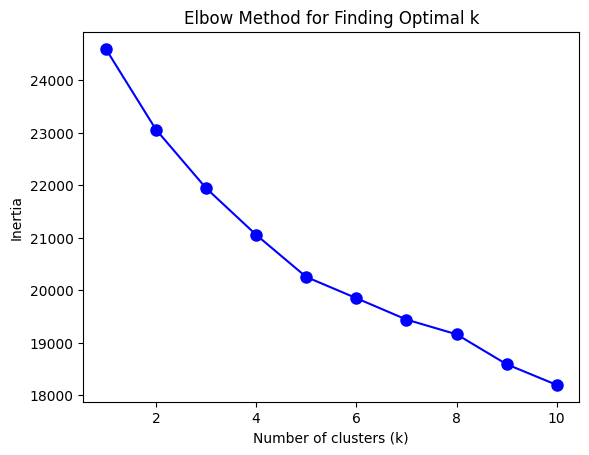

In [98]:
# use the elbow method to determine the appropriate amount of clusters
inertia = []
k_values = range(1, 11)

for k in k_values:
    poss_kmean = KMeans(n_clusters=k, random_state=42)
    poss_kmean.fit(scaled_survey_data)
    inertia.append(poss_kmean.inertia_)


# plot the elbow plot
plt.plot(k_values, inertia, "bo-", markersize=8)
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Finding Optimal k")
plt.show()

In [200]:
# conduct kmeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_survey_data)

KMeans(n_clusters=4, random_state=42)

In [201]:
# add cluster labels to data frame
cluster_labels = kmeans.labels_
amazon_kmeans_dfcopy = amazon_kmeans_df.copy()
amazon_kmeans_df.loc[:, "Cluster"] = cluster_labels

In [202]:
# get cluster centers
cluster_centers = kmeans.cluster_centers_

In [203]:
columns_of_interest_categorical = [
    "age",
    "Gender",
    "Purchase_Frequency",
    "Browsing_Frequency",
    "Customer_Reviews_Importance",
    "Add_to_Cart_Browsing",
    "Cart_Completion_Frequency",
    "Cart_Abandonment_Factors",
    "Home_Kitchen",
    "Beauty_PersonalCare",
    "Groceries_GourmetFood",
    "Clothing_Fashion",
    "others",
]


cluster_mode_cat = {}

# takes the mode of each column of interest listed above, by cluster
for col_name in columns_of_interest_categorical:
    mode_col = amazon_kmeans_df.groupby("Cluster")[col_name].agg(lambda x: x.mode()[0])
    cluster_mode_cat[col_name] = mode_col

cluster_mode_df = pd.DataFrame(cluster_mode_cat)

print(cluster_mode_df)

         age  Gender      Purchase_Frequency Browsing_Frequency  \
Cluster                                                           
0         23  Female       Few times a month  Few times a month   
1         23  Female       Few times a month   Few times a week   
2         26  Female       Few times a month   Few times a week   
3         23    Male  Less than once a month             Rarely   

         Customer_Reviews_Importance Add_to_Cart_Browsing  \
Cluster                                                     
0                                  3                Maybe   
1                                  3                Maybe   
2                                  1                  Yes   
3                                  1                  Yes   

        Cart_Completion_Frequency                    Cart_Abandonment_Factors  \
Cluster                                                                         
0                       Sometimes              Found a better price 

# maybe scratch that lol

## correlation between variables

In [103]:
amazon_df.head()

age             Gender      Purchase_Frequency  \
0   23             Female       Few times a month   
1   23             Female            Once a month   
2   24  Prefer not to say       Few times a month   
3   24             Female            Once a month   
4   22             Female  Less than once a month   

                                 Purchase_Categories  \
0                           Beauty and Personal Care   
1                               Clothing and Fashion   
2    Groceries and Gourmet Food;Clothing and Fashion   
3  Beauty and Personal Care;Clothing and Fashion;...   
4      Beauty and Personal Care;Clothing and Fashion   

  Personalized_Recommendation_Frequency Browsing_Frequency  \
0                                   Yes   Few times a week   
1                                   Yes  Few times a month   
2                                    No  Few times a month   
3                             Sometimes  Few times a month   
4                                   Yes  Few times a month   

  Product_Search_Method Search_Result_Exploration  \
0               Keyword            Multiple pages   
1               Keyword            Multiple pages   
2               Keyword            Multiple pages   
3               Keyword                First page   
4                Filter            Multiple pages   

   Customer_Reviews_Importance Add_to_Cart_Browsing  ...  \
0                            1                  Yes  ...   
1                            1                  Yes  ...   
2                            2                  Yes  ...   
3                            5                Maybe  ...   
4                            1                  Yes  ...   

  Recommendation_Helpfulness Rating_Accuracy  Shopping_Satisfaction  \
0                        Yes                1                     1   
1                  Sometimes                3                     2   
2                         No                3                     3   
3                  Sometimes                3                     4   
4                        Yes                2                     2   

     Service_Appreciation             Improvement_Areas Home_Kitchen  \
0      Competitive prices      Reducing packaging waste          0.0   
1  Wide product selection      Reducing packaging waste          0.0   
2      Competitive prices  Product quality and accuracy          0.0   
3      Competitive prices  Product quality and accuracy          0.0   
4      Competitive prices  Product quality and accuracy          0.0   

   Beauty_PersonalCare Groceries_GourmetFood  Clothing_Fashion  others  
0                  1.0                   0.0               0.0     0.0  
1                  0.0                   0.0               1.0     0.0  
2                  0.0                   1.0               1.0     0.0  
3                  1.0                   0.0               1.0     1.0  
4                  1.0                   0.0               1.0     0.0  

[5 rows x 27 columns]

Significant correlation between Purchase_Categories and Beauty_PersonalCare: -0.5890625529161244
Significant correlation between Purchase_Categories and Groceries_GourmetFood: 0.36406164791534645
Significant correlation between Purchase_Categories and others: 0.5290805015598398
Significant correlation between Customer_Reviews_Importance and Review_Reliability: 0.36706705303288234
Significant correlation between Customer_Reviews_Importance and Shopping_Satisfaction: 0.4017290550226257
Significant correlation between Review_Reliability and Customer_Reviews_Importance: 0.36706705303288234
Significant correlation between Review_Reliability and Review_Helpfulness: -0.35974525718517913
Significant correlation between Review_Helpfulness and Review_Reliability: -0.35974525718517913
Significant correlation between Review_Helpfulness and Recommendation_Helpfulness: 0.4218026722019429
Significant correlation between Personalized_Recommendation_Frequency  and Rating_Accuracy : 0.43846705865730623


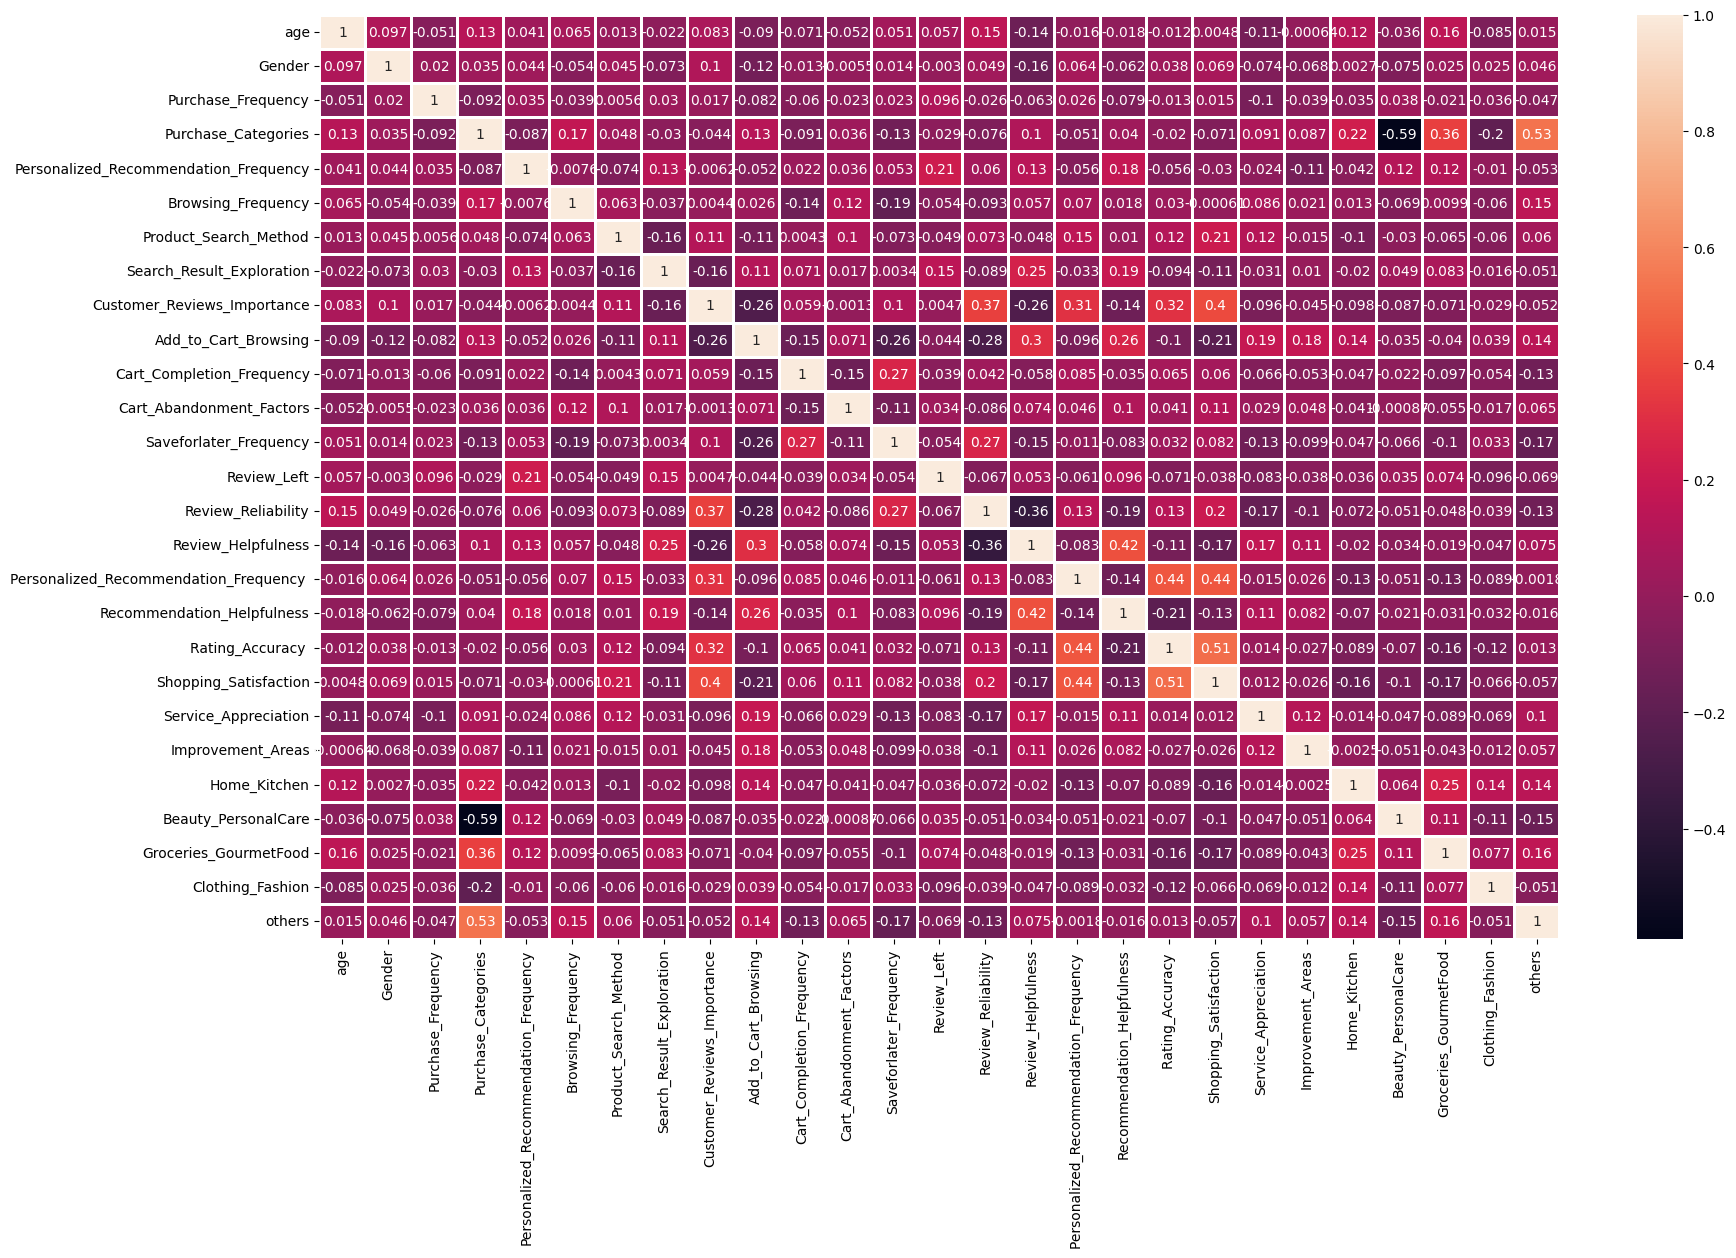

In [104]:
# Your existing code
amazon_df_encoded = amazon_df.copy()
get_rid = [
    "Home_Kitchen",
    "Beauty_PersonalCare",
    "Groceries_GourmetFood",
    "Clothing_Fashion",
    "others",
]
# for i in get_rid:
# amazon_df_encoded.drop(i, axis=1, inplace=True)

le = LabelEncoder()
lst = [
    "age",
    "Gender",
    "Purchase_Categories",
    "Purchase_Frequency",
    "Personalized_Recommendation_Frequency",
    "Recommendation_Helpfulness",
    "Browsing_Frequency",
    "Product_Search_Method",
    "Search_Result_Exploration",
    "Add_to_Cart_Browsing",
    "Cart_Completion_Frequency",
    "Cart_Abandonment_Factors",
    "Saveforlater_Frequency",
    "Review_Left",
    "Review_Reliability",
    "Review_Helpfulness",
    "Service_Appreciation",
    "Improvement_Areas",
]
for i in lst:
    amazon_df_encoded[i] = le.fit_transform(amazon_df_encoded[i])

# Calculate correlation matrix
correlation_matrix = amazon_df_encoded.corr()

# Set a threshold for significance
threshold = 0.35  # You can adjust this value as needed

# Find significant correlations
significant_correlations = correlation_matrix[abs(correlation_matrix) > threshold]

# Print significant correlations
for col in significant_correlations.columns:
    correlated_features = significant_correlations.index[
        significant_correlations[col].notnull()
    ]
    for feature in correlated_features:
        if feature != col:
            print(
                f"Significant correlation between {col} and {feature}: {significant_correlations[col][feature]}"
            )

# Plot heatmap
fig, ax = plt.subplots(1, 1, figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, linewidths=1)
plt.show()

In [168]:
amazon_df_corr = amazon_df.copy()
amazon_df_corr = amazon_df_corr.drop(["Home_Kitchen", "Beauty_PersonalCare"], axis=1)
amazon_df_corr.head(10)

age             Gender      Purchase_Frequency  \
0   23             Female       Few times a month   
1   23             Female            Once a month   
2   24  Prefer not to say       Few times a month   
3   24             Female            Once a month   
4   22             Female  Less than once a month   
5   21             Female  Less than once a month   
6   22             Female  Less than once a month   
7   21             Female       Few times a month   
8   20             Female  Less than once a month   
9   23             Female  Less than once a month   

                                 Purchase_Categories  \
0                           Beauty and Personal Care   
1                               Clothing and Fashion   
2    Groceries and Gourmet Food;Clothing and Fashion   
3  Beauty and Personal Care;Clothing and Fashion;...   
4      Beauty and Personal Care;Clothing and Fashion   
5                               Clothing and Fashion   
6                               Clothing and Fashion   
7      Beauty and Personal Care;Clothing and Fashion   
8      Beauty and Personal Care;Clothing and Fashion   
9      Beauty and Personal Care;Clothing and Fashion   

  Personalized_Recommendation_Frequency Browsing_Frequency  \
0                                   Yes   Few times a week   
1                                   Yes  Few times a month   
2                                    No  Few times a month   
3                             Sometimes  Few times a month   
4                                   Yes  Few times a month   
5                                    No             Rarely   
6                                    No             Rarely   
7                                    No             Rarely   
8                             Sometimes  Few times a month   
9                                    No             Rarely   

  Product_Search_Method Search_Result_Exploration  \
0               Keyword            Multiple pages   
1               Keyword            Multiple pages   
2               Keyword            Multiple pages   
3               Keyword                First page   
4                Filter            Multiple pages   
5            categories            Multiple pages   
6                Filter            Multiple pages   
7               Keyword            Multiple pages   
8               Keyword                First page   
9               Keyword            Multiple pages   

   Customer_Reviews_Importance Add_to_Cart_Browsing  ...  \
0                            1                  Yes  ...   
1                            1                  Yes  ...   
2                            2                  Yes  ...   
3                            5                Maybe  ...   
4                            1                  Yes  ...   
5                            1                  Yes  ...   
6                            1                  Yes  ...   
7                            1                  Yes  ...   
8                            1                  Yes  ...   
9                            1                  Yes  ...   

  Personalized_Recommendation_Frequency  Recommendation_Helpfulness  \
0                                      2                        Yes   
1                                      2                  Sometimes   
2                                      4                         No   
3                                      3                  Sometimes   
4                                      4                        Yes   
5                                      5                         No   
6                                      3                  Sometimes   
7                                      3                  Sometimes   
8                                      2                        Yes   
9                                      3                        Yes   

  Rating_Accuracy  Shopping_Satisfaction    Service_Appreciation  \
0                1      

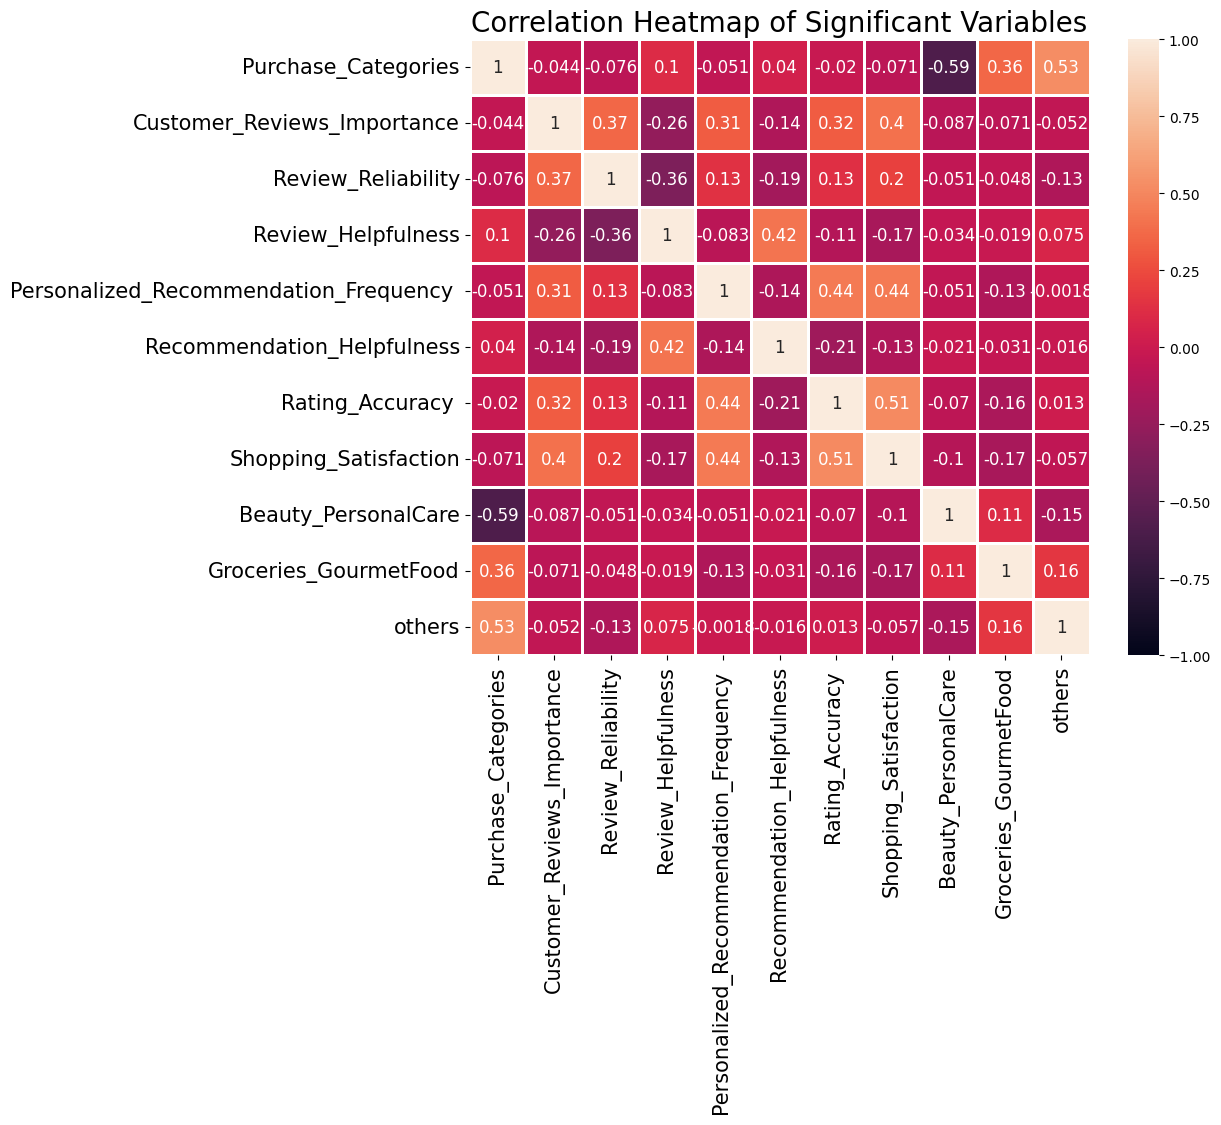

In [171]:
# Calculate correlation matrix
correlation_matrix = amazon_df_encoded.corr()

# Set a threshold for significance
threshold = 0.35  # Adjust as needed

# Identify significant correlations
significant_pairs = correlation_matrix[
    (abs(correlation_matrix) > threshold) & (correlation_matrix != 1)
]
significant_variables = significant_pairs.columns[significant_pairs.any()]

# Create a smaller subset correlation matrix for significant variables
subset_correlation_matrix = correlation_matrix.loc[
    significant_variables, significant_variables
]


# Plot heatmap for the subset of significant correlations
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
sns.heatmap(
    subset_correlation_matrix,
    annot=True,
    linewidths=1,
    vmin=-1,
    vmax=1,
    annot_kws={"size": 12},
)
plt.title("Correlation Heatmap of Significant Variables", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [173]:
amazon_df_encoded.head(10)

age  Gender  Purchase_Frequency  Purchase_Categories  \
0   10       0                   0                    0   
1   10       0                   3                    8   
2   11       3                   0                   20   
3   11       0                   3                    4   
4    9       0                   1                    1   
5    8       0                   1                    8   
6    9       0                   1                    8   
7    8       0                   0                    1   
8    7       0                   1                    1   
9   10       0                   1                    1   

   Personalized_Recommendation_Frequency  Browsing_Frequency  \
0                                      2                   1   
1                                      2                   0   
2                                      0                   0   
3                                      1                   0   
4                                      2                   0   
5                                      0                   3   
6                                      0                   3   
7                                      0                   3   
8                                      1                   0   
9                                      0                   3   

   Product_Search_Method  Search_Result_Exploration  \
0                      1                          1   
1                      1                          1   
2                      1                          1   
3                      1                          0   
4                      0                          1   
5                      2                          1   
6                      0                          1   
7                      1                          1   
8                      1                          0   
9                      1                          1   

   Customer_Reviews_Importance  Add_to_Cart_Browsing  ...  Review_Left  \
0                            1                     2  ...            1   
1                            1                     2  ...            0   
2                            2                     2  ...            0   
3                            5                     0  ...            1   
4                            1                     2  ...            0   
5                            1                     2  ...            0   
6                            1                     2  ...            0   
7                            1                     2  ...            0   
8                            1                     2  ...            0   
9                            1                     2  ...            0   

   Review_Reliability  Review_Helpfulness  \
0                   3                   2   
1                   0                   2   
2                   3                   0   
3                   0                   2   
4                   0                   2   
5                   0                   2   
6                   0                   2   
7                   0                   1   
8                   1                   2   
9                   0                   2   

   Personalized_Recommendation_Frequency   Recommendation_Helpfulness  \
0                                       2                           2   
1                                       2                           1   
2                                       4                           0   
3                                       3                           1   
4                                       4                           2   
5                                       5                           0   
6                                       3                           1   
7                                       3                           1   
8                                       2                           2   
9

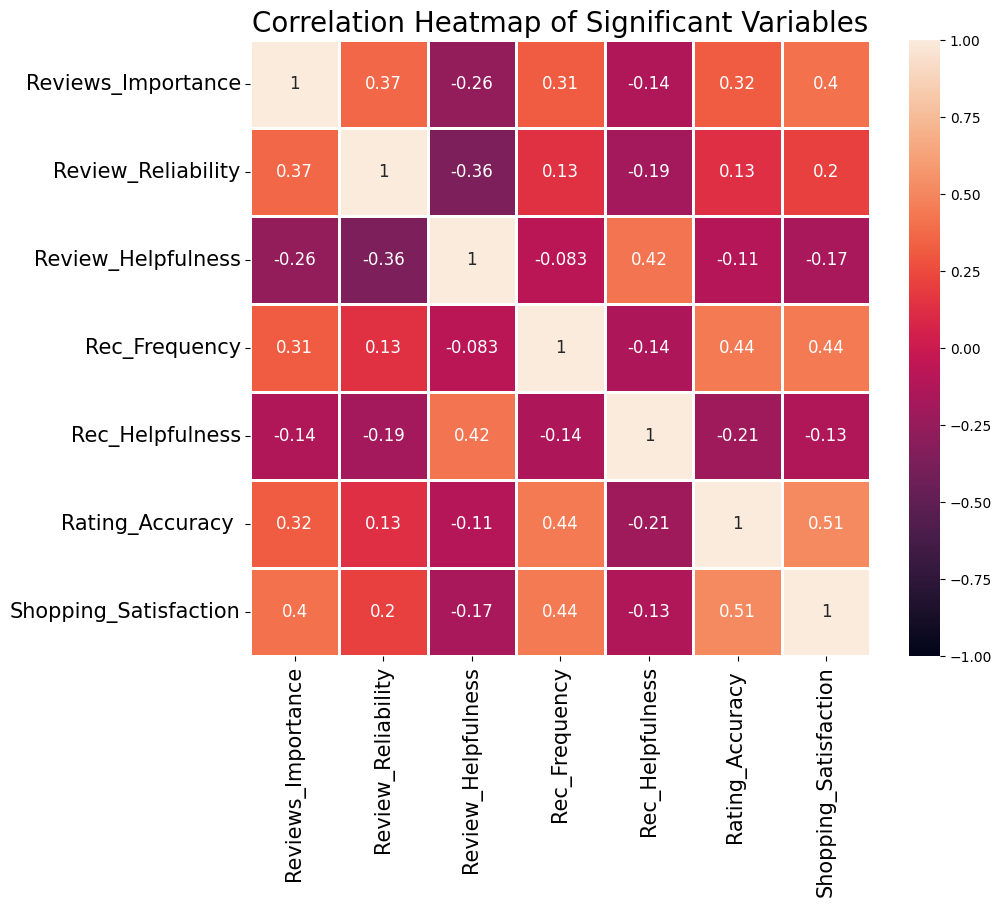

In [177]:
# Calculate correlation matrix
correlation_matrix = amazon_df_encoded.corr()

# Set a threshold for significance
threshold = 0.35  # Adjust as needed

# Identify significant correlations
significant_pairs = correlation_matrix[
    (abs(correlation_matrix) > threshold) & (correlation_matrix != 1)
]
significant_variables = significant_pairs.columns[significant_pairs.any()]

# Create a smaller subset correlation matrix for significant variables
subset_correlation_matrix = correlation_matrix.loc[
    significant_variables, significant_variables
]

rename_dict = {
    "Customer_Reviews_Importance": "Reviews_Importance",
    "Personalized_Recommendation_Frequency ": "Rec_Frequency",
    "Recommendation_Helpfulness": "Rec_Helpfulness",
}
subset_correlation_matrix.rename(columns=rename_dict, index=rename_dict, inplace=True)


# Plot heatmap for the subset of significant correlations
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
sns.heatmap(
    subset_correlation_matrix,
    annot=True,
    linewidths=1,
    vmin=-1,
    vmax=1,
    annot_kws={"size": 12},
)
plt.title("Correlation Heatmap of Significant Variables", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

# Chi square test

In [120]:
# Create a contingency table
contingency_table = pd.crosstab(
    amazon_df["Purchase_Frequency"], amazon_df["Customer_Reviews_Importance"]
)
print(contingency_table)

Customer_Reviews_Importance   1   2   3   4   5
Purchase_Frequency                             
Few times a month            41  41  91  20   9
Less than once a month       62  13  19  18  12
Multiple times a week        15   7  26   5   3
Once a month                 35  23  29  11   8
Once a week                  15  31  50  10   6


In [121]:
# Perform the Chi-square test
chi2_stat, p_value, dof, expected_freq = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected_freq)

Chi-square Statistic: 77.91367366335852
P-value: 3.94611916828539e-10
Degrees of Freedom: 16
Expected Frequencies:
[[56.56       38.71666667 72.38333333 21.54666667 12.79333333]
 [34.72       23.76666667 44.43333333 13.22666667  7.85333333]
 [15.68       10.73333333 20.06666667  5.97333333  3.54666667]
 [29.68       20.31666667 37.98333333 11.30666667  6.71333333]
 [31.36       21.46666667 40.13333333 11.94666667  7.09333333]]


In [122]:
alpha = 0.05  # significance level
if p_value < alpha:
    print(
        "Reject the null hypothesis: There is a significant association between Save for Later Frequency and Cart Abandonment Factors."
    )
else:
    print(
        "Fail to reject the null hypothesis: No significant association between Save for Later Frequency and Cart Abandonment Factors."
    )

Reject the null hypothesis: There is a significant association between Save for Later Frequency and Cart Abandonment Factors.


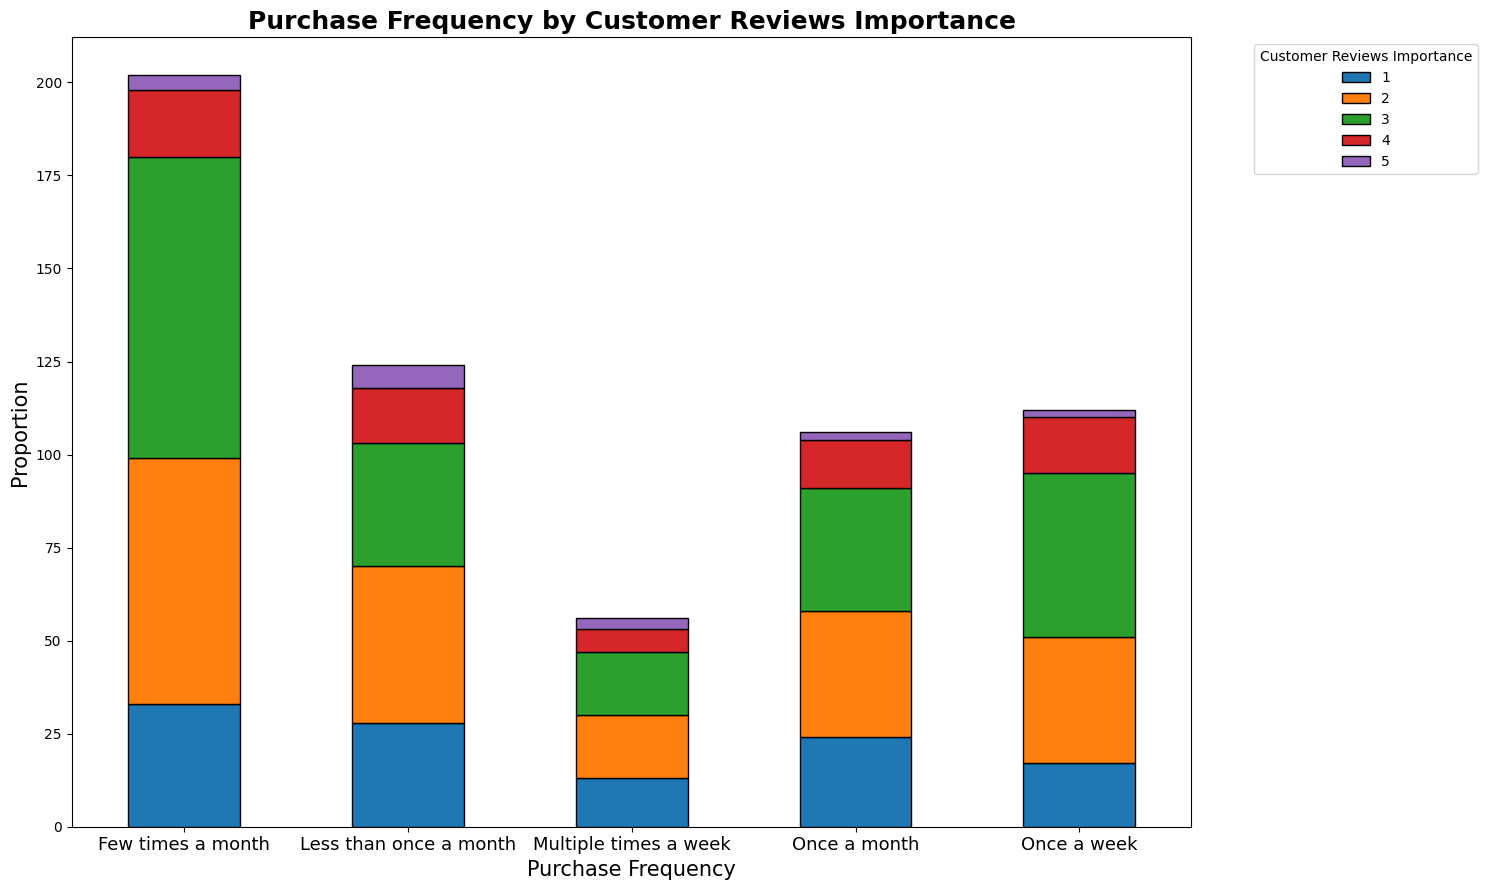

In [184]:
# Plot stacked bar chart
contingency_table.plot(kind="bar", stacked=True, edgecolor="black", figsize=(15, 9))

# Customize chart
plt.xlabel("Purchase Frequency", fontsize=15)
plt.xticks(rotation=0, fontsize=13)
plt.ylabel("Proportion", fontsize=15)
plt.title(
    "Purchase Frequency by Customer Reviews Importance", fontsize=18, fontweight="bold"
)
plt.legend(
    title="Customer Reviews Importance", bbox_to_anchor=(1.05, 1), loc="upper left"
)
plt.tight_layout()
plt.show()

In [160]:
# Create a contingency table
contingency_table2 = pd.crosstab(
    amazon_df["Purchase_Frequency"], amazon_df["Shopping_Satisfaction"]
)
print(contingency_table2)

Shopping_Satisfaction    1   2   3   4  5
Purchase_Frequency                       
Few times a month       33  66  81  18  4
Less than once a month  28  42  33  15  6
Multiple times a week   13  17  17   6  3
Once a month            24  34  33  13  2
Once a week             17  34  44  15  2


In [161]:
# Perform the Chi-square test
chi2_stat, p_value, dof, expected_freq = chi2_contingency(contingency_table2)

# Print the results
print(f"Chi-square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected_freq)

Chi-square Statistic: 15.329432376298493
P-value: 0.5006555753394495
Degrees of Freedom: 16
Expected Frequencies:
[[38.71666667 64.97666667 70.02666667 22.55666667  5.72333333]
 [23.76666667 39.88666667 42.98666667 13.84666667  3.51333333]
 [10.73333333 18.01333333 19.41333333  6.25333333  1.58666667]
 [20.31666667 34.09666667 36.74666667 11.83666667  3.00333333]
 [21.46666667 36.02666667 38.82666667 12.50666667  3.17333333]]


# logistic regression

In [127]:
import pandas as pd
import statsmodels.api as sm

# Create dummy variables for the categorical response
amazon_df["Purchase_Frequency"] = pd.Categorical(amazon_df["Purchase_Frequency"])
y = amazon_df["Purchase_Frequency"].cat.codes  # Convert to numeric codes for regression

# Add a constant to the independent variable
X = sm.add_constant(amazon_df["Customer_Reviews_Importance"])

# Fit multinomial logistic regression
model = sm.MNLogit(y, X)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 1.524762
         Iterations 5
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                  600
Model:                        MNLogit   Df Residuals:                      592
Method:                           MLE   Df Model:                            4
Date:                Mon, 28 Oct 2024   Pseudo R-squ.:                0.005543
Time:                        11:28:17   Log-Likelihood:                -914.86
converged:                       True   LL-Null:                       -919.96
Covariance Type:            nonrobust   LLR p-value:                   0.03721
                        y=1       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.1245      0.262      0.476      0.634   

In [128]:
amazon_df["Purchase_Frequency"].value_counts()

Purchase_Frequency
Few times a month         202
Less than once a month    124
Once a week               112
Once a month              106
Multiple times a week      56
Name: count, dtype: int64

# ANOVA

In [129]:
import pandas as pd
from scipy.stats import f_oneway

# Assuming amazon_df is your DataFrame with columns 'Purchase_Frequency' and 'age'

# Separate age data by Purchase_Frequency group
few_times_month = amazon_df[amazon_df["Purchase_Frequency"] == "Few times a month"][
    "age"
]
less_once_month = amazon_df[
    amazon_df["Purchase_Frequency"] == "Less than once a month"
]["age"]
once_week = amazon_df[amazon_df["Purchase_Frequency"] == "Once a week"]["age"]
once_month = amazon_df[amazon_df["Purchase_Frequency"] == "Once a month"]["age"]
multiple_times_week = amazon_df[
    amazon_df["Purchase_Frequency"] == "Multiple times a week"
]["age"]

# Perform ANOVA
anova_result = f_oneway(
    few_times_month, less_once_month, once_week, once_month, multiple_times_week
)

# Display results
print("ANOVA F-statistic:", anova_result.statistic)
print("ANOVA p-value:", anova_result.pvalue)

ANOVA F-statistic: 2.5846058897477673
ANOVA p-value: 0.03616515673367679


/var/folders/bs/tlrmg2n164520pry59rs7fvh0000gn/T/ipykernel_52688/4133012645.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(
/var/folders/bs/tlrmg2n164520pry59rs7fvh0000gn/T/ipykernel_52688/4133012645.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = amazon_df.groupby("Purchase_Frequency")["age"].median().values


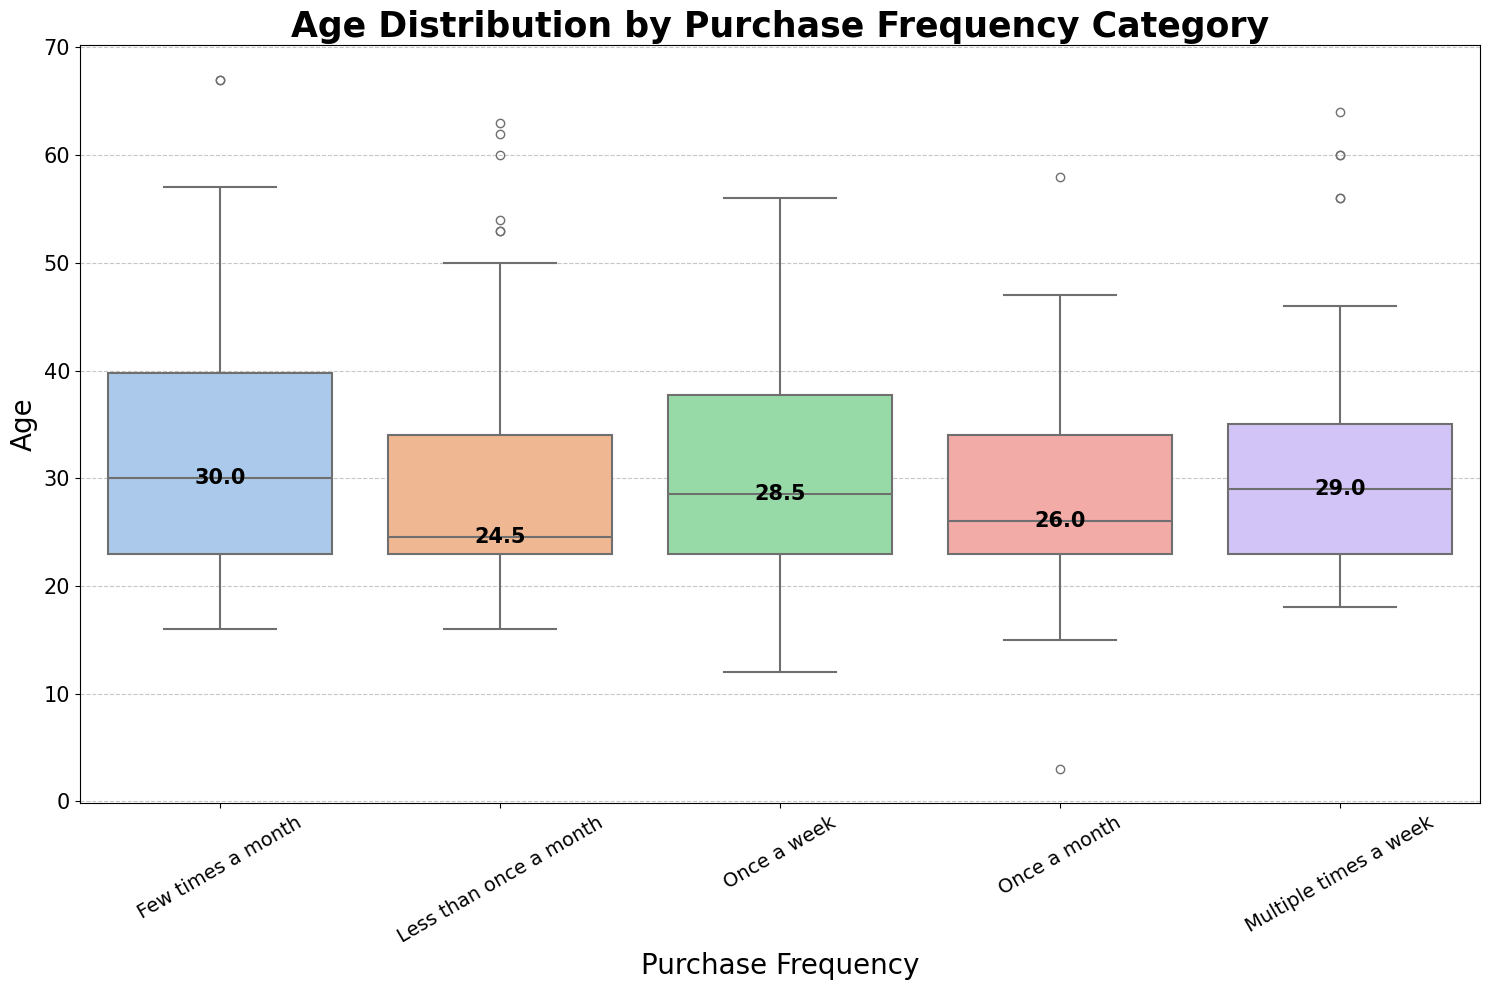

In [188]:
# Assuming amazon_df is your DataFrame with columns 'Purchase_Frequency' and 'age'

# Set up the plot
plt.figure(figsize=(15, 10))
ax = sns.boxplot(
    data=amazon_df, x="Purchase_Frequency", y="age", palette="pastel", linewidth=1.5
)

# Customizing the plot
plt.title(
    "Age Distribution by Purchase Frequency Category", fontsize=25, fontweight="bold"
)
plt.xlabel("Purchase Frequency", fontsize=20)
plt.ylabel("Age", fontsize=20)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=15)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Adding custom labels for x-ticks if needed
custom_labels = [
    "Few times a month",
    "Less than once a month",
    "Once a week",
    "Once a month",
    "Multiple times a week",
]
plt.xticks(ticks=range(len(custom_labels)), labels=custom_labels, rotation=30)

# Optionally add annotations for median values on each box
medians = amazon_df.groupby("Purchase_Frequency")["age"].median().values
for i, median in enumerate(medians):
    plt.text(
        i,
        median,
        f"{median:.1f}",
        ha="center",
        va="center",
        fontsize=15,
        color="black",
        fontweight="bold",
    )

plt.tight_layout()  # Adjust layout for readability

# Show plot
plt.show()

/var/folders/bs/tlrmg2n164520pry59rs7fvh0000gn/T/ipykernel_52688/3379624907.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=amazon_df, x='Purchase_Frequency', y='age', palette="pastel", linewidth=1.5)
/var/folders/bs/tlrmg2n164520pry59rs7fvh0000gn/T/ipykernel_52688/3379624907.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = amazon_df.groupby('Purchase_Frequency')['age'].mean().values


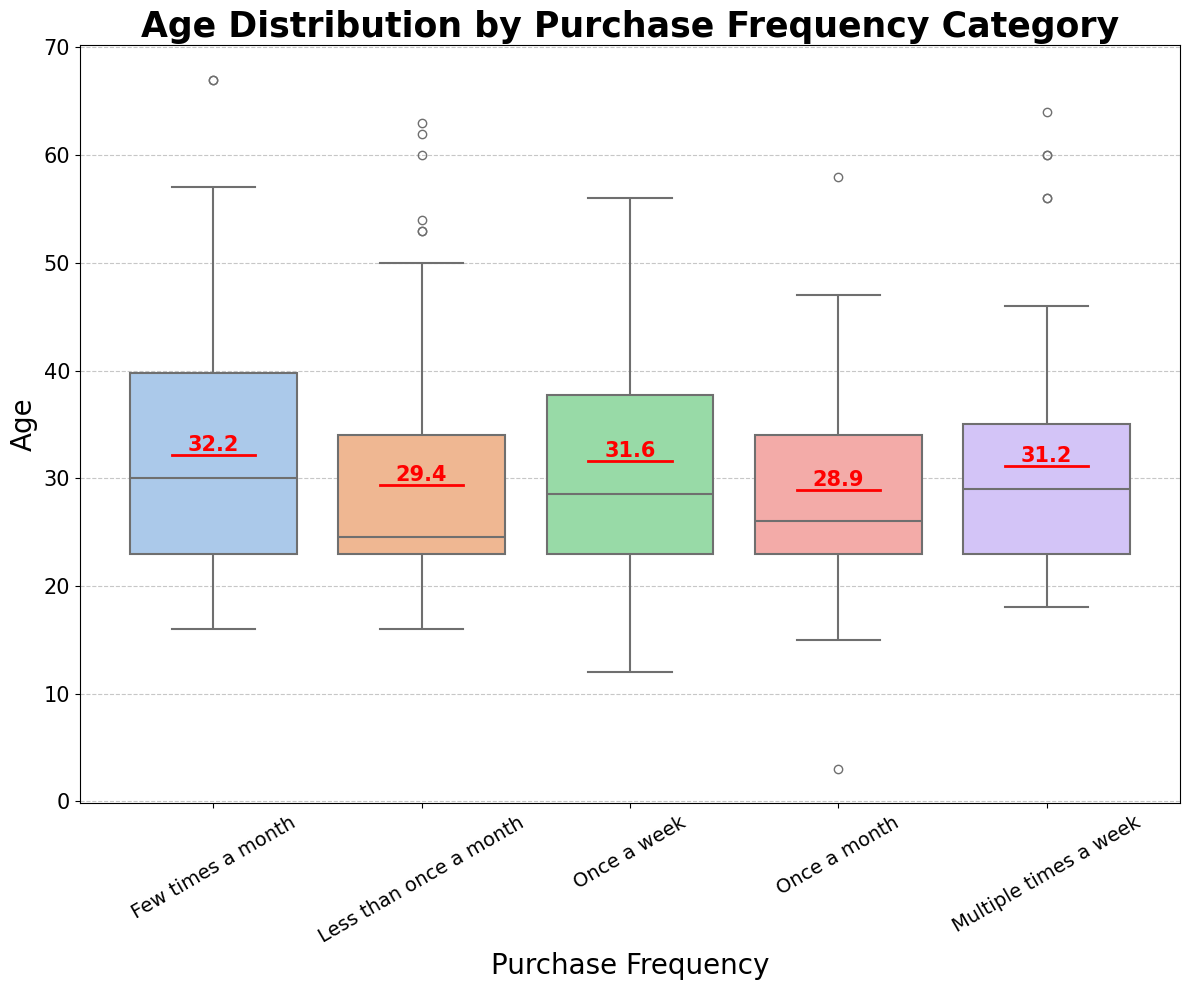

In [162]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming amazon_df is your DataFrame with columns 'Purchase_Frequency' and 'age'

# Set up the plot
plt.figure(figsize=(12, 10))
ax = sns.boxplot(
    data=amazon_df, x="Purchase_Frequency", y="age", palette="pastel", linewidth=1.5
)

# Calculate means and add them as a line
means = amazon_df.groupby("Purchase_Frequency")["age"].mean().values
for i, mean in enumerate(means):
    plt.plot(
        [i - 0.2, i + 0.2], [mean, mean], color="red", linewidth=2
    )  # Line indicating the mean
    plt.text(
        i,
        mean,
        f"{mean:.1f}",
        ha="center",
        va="bottom",
        fontsize=15,
        color="red",
        fontweight="bold",
    )

# Customizing the plot
plt.title(
    "Age Distribution by Purchase Frequency Category", fontsize=25, fontweight="bold"
)
plt.xlabel("Purchase Frequency", fontsize=20)
plt.ylabel("Age", fontsize=20)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=15)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Custom labels for x-ticks if needed
custom_labels = [
    "Few times a month",
    "Less than once a month",
    "Once a week",
    "Once a month",
    "Multiple times a week",
]
plt.xticks(ticks=range(len(custom_labels)), labels=custom_labels, rotation=30)

plt.tight_layout()  # Adjust layout for readability

# Show plot
plt.show()

In [110]:
# Load your data into a DataFrame, e.g., df
# Convert purchase frequency categories to a numerical scale
amazon_df["Purchase_Frequency_Num"] = amazon_df["Purchase_Frequency"].map(
    {
        "Less than once a month": 1,
        "Once a month": 2,
        "Few times a month": 3,
        "Once a week": 4,
        "Multiple times a week": 5,
    }
)

# Calculate Pearson correlations with numeric columns
correlation_matrix = amazon_df.corr()
purchase_corr = correlation_matrix["Purchase_Frequency_Num"].sort_values(
    ascending=False
)
print(purchase_corr)

ValueError: could not convert string to float: 'Female'

In [220]:
allthevariables = [
    "age",
    "gender",
    "Purchase_Frequency",
    "Purchase_Categories",
    "Personalized_Recommendation_Frequency",
    "Browsing_Frequency",
    "Product_Search_Method",
    "Search_Result_Exploration",
    "Customer_Reviews_Importance",
    "Add_to_Cart_Browsing",
    "Cart_Completion_Frequency",
    "Cart_Abandonment_Factors",
    "Saveforlater_Frequency",
    "Review_Left",
    "Review_Reliability",
    "Review_Helpfulness",
    "Personalized_Recommendation_Frequency",
    "Recommendation_Helpfulness",
    "Rating_Accuracy",
    "Shopping_Satisfaction",
    "Service_Appreciation",
    "Improvement_Areas",
]


for variable0 in allthevariables:
    # Create a cross-tabulation between purchase frequency and another categorical variable
    contingency_table = pd.crosstab(
        amazon_df["Purchase_Frequency"], amazon_df[variable0]
    )

    # Perform the Chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print("Chi-square test results:")
    print("Chi-square statistic:", chi2)
    print("p-value:", p)

    alpha = 0.05  # significance level
    if p_value < alpha:
        print(
            "Reject the null hypothesis: There is a significant association "
            + variable0
        )
    else:
        print(
            "Fail to reject the null hypothesis: No significant association " + variable
        )

Chi-square test results:
Chi-square statistic: 265.4085619060784
p-value: 0.0007028347260757509
Reject the null hypothesis: There is a significant association age


KeyError: 'gender'

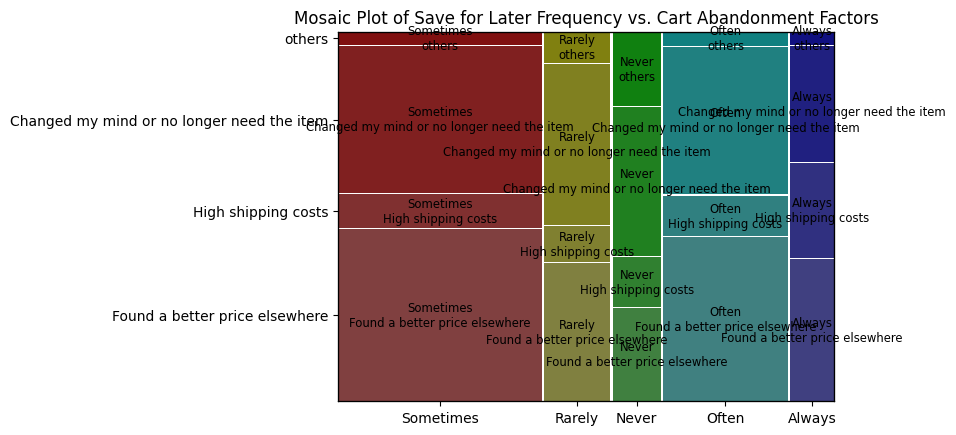

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

# Create a mosaic plot
mosaic(
    amazon_df,
    ["Saveforlater_Frequency", "Cart_Abandonment_Factors"],
    title="Mosaic Plot of Save for Later Frequency vs. Cart Abandonment Factors",
)

# Show the plot
plt.show()

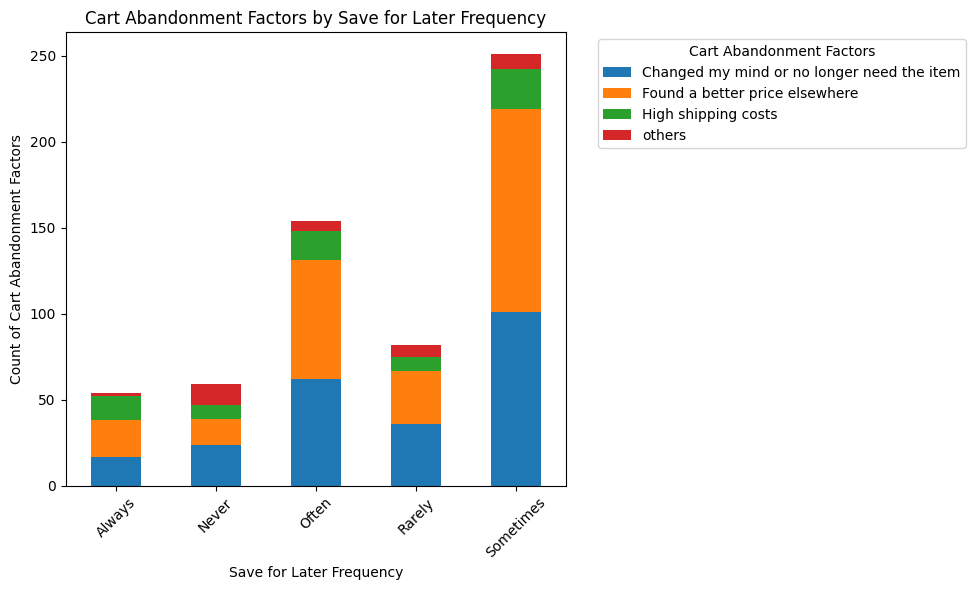

In [44]:
# Sample code to prepare the data
# Group by 'Saveforlater_Frequency' and count occurrences of each category in 'Cart_Abandonment_Factors'
abandonment_counts = (
    amazon_df.groupby("Saveforlater_Frequency")["Cart_Abandonment_Factors"]
    .value_counts()
    .unstack()
)

# Create a bar plot
abandonment_counts.plot(kind="bar", stacked=True, figsize=(10, 6))

# Add labels and title
plt.title("Cart Abandonment Factors by Save for Later Frequency")
plt.xlabel("Save for Later Frequency")
plt.ylabel("Count of Cart Abandonment Factors")
plt.xticks(rotation=45)
plt.legend(title="Cart Abandonment Factors", bbox_to_anchor=(1.05, 1), loc="upper left")

# Save the plot to a file
plt.tight_layout()
plt.savefig("bar_plot.png", bbox_inches="tight", dpi=300)
plt.show()

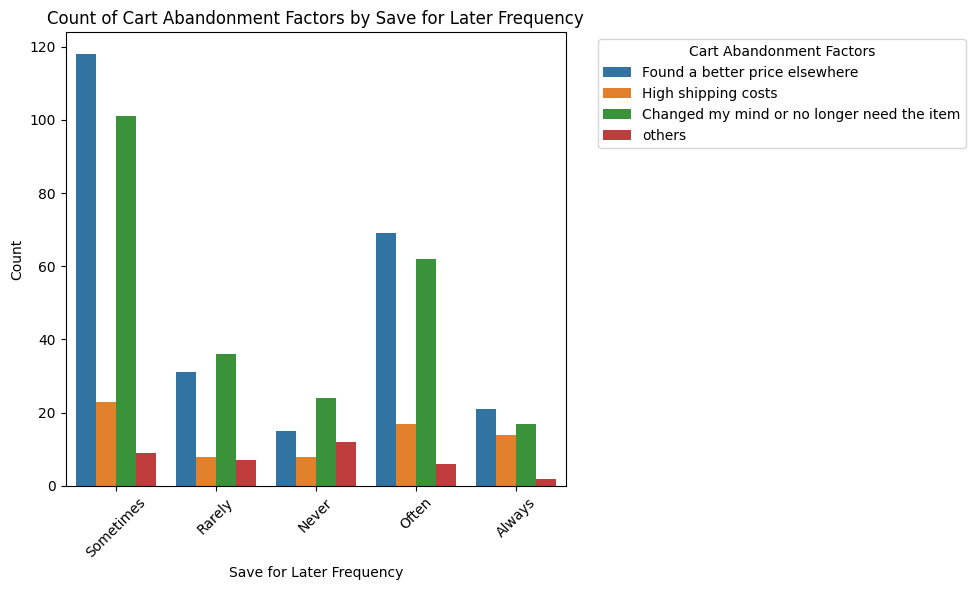

In [46]:
import seaborn as sns

# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(
    data=amazon_df, x="Saveforlater_Frequency", hue="Cart_Abandonment_Factors"
)

# Add labels and title
plt.title("Count of Cart Abandonment Factors by Save for Later Frequency")
plt.xlabel("Save for Later Frequency")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Cart Abandonment Factors", bbox_to_anchor=(1.05, 1), loc="upper left")

# Save the plot to a file
plt.tight_layout()
plt.savefig("count_plot.png", bbox_inches="tight", dpi=300)
plt.show()

In [47]:
amazon_df.head()

age             Gender      Purchase_Frequency  \
0   23             Female       Few times a month   
1   23             Female            Once a month   
2   24  Prefer not to say       Few times a month   
3   24             Female            Once a month   
4   22             Female  Less than once a month   

                                 Purchase_Categories  \
0                           Beauty and Personal Care   
1                               Clothing and Fashion   
2    Groceries and Gourmet Food;Clothing and Fashion   
3  Beauty and Personal Care;Clothing and Fashion;...   
4      Beauty and Personal Care;Clothing and Fashion   

  Personalized_Recommendation_Frequency Browsing_Frequency  \
0                                   Yes   Few times a week   
1                                   Yes  Few times a month   
2                                    No  Few times a month   
3                             Sometimes  Few times a month   
4                                   Yes  Few times a month   

  Product_Search_Method Search_Result_Exploration  \
0               Keyword            Multiple pages   
1               Keyword            Multiple pages   
2               Keyword            Multiple pages   
3               Keyword                First page   
4                Filter            Multiple pages   

   Customer_Reviews_Importance Add_to_Cart_Browsing  ...  \
0                            1                  Yes  ...   
1                            1                  Yes  ...   
2                            2                  Yes  ...   
3                            5                Maybe  ...   
4                            1                  Yes  ...   

  Saveforlater_Frequency Review_Left Review_Reliability Review_Helpfulness  \
0              Sometimes         Yes       Occasionally                Yes   
1                 Rarely          No            Heavily                Yes   
2                 Rarely          No       Occasionally                 No   
3              Sometimes         Yes            Heavily                Yes   
4                 Rarely          No            Heavily                Yes   

  Personalized_Recommendation_Frequency  Recommendation_Helpfulness  \
0                                      2                        Yes   
1                                      2                  Sometimes   
2                                      4                         No   
3                                      3                  Sometimes   
4                                      4                        Yes   

   Rating_Accuracy  Shopping_Satisfaction    Service_Appreciation  \
0                 1                     1      Competitive prices   
1                 3                     2  Wide product selection   
2                 3                     3      Competitive prices   
3                 3                     4      Competitive prices   
4                 2                     2      Competitive prices   

              Improvement_Areas  
0      Reducing packaging waste  
1      Reducing packaging waste  
2  Product quality and accuracy  
3  Product quality and accuracy  
4  Product quality and accuracy  

[5 rows x 22 columns]

In [48]:
# Create a contingency table
contingency_table = pd.crosstab(
    amazon_df["Purchase_Frequency"], amazon_df["Purchase_Categories"]
)

# Display the contingency table
print("Contingency Table:")
print(contingency_table)

# Conduct the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

# Interpretation
alpha = 0.05
if p < alpha:
    print(
        "\nReject the null hypothesis: There is a significant association between Purchase Frequency and Purchase Categories."
    )
else:
    print(
        "\nFail to reject the null hypothesis: There is no significant association between Purchase Frequency and Purchase Categories."
    )

Contingency Table:
Purchase_Categories     Beauty and Personal Care  \
Purchase_Frequency                                 
Few times a month                             34   
Less than once a month                        12   
Multiple times a week                         15   
Once a month                                  10   
Once a week                                   35   

Purchase_Categories     Beauty and Personal Care;Clothing and Fashion  \
Purchase_Frequency                                                      
Few times a month                                                  20   
Less than once a month                                             12   
Multiple times a week                                               6   
Once a month                                                        3   
Once a week                                                         5   

Purchase_Categories     Beauty and Personal Care;Clothing and Fashion;Home and Kitchen  \
Purchase_Frequ

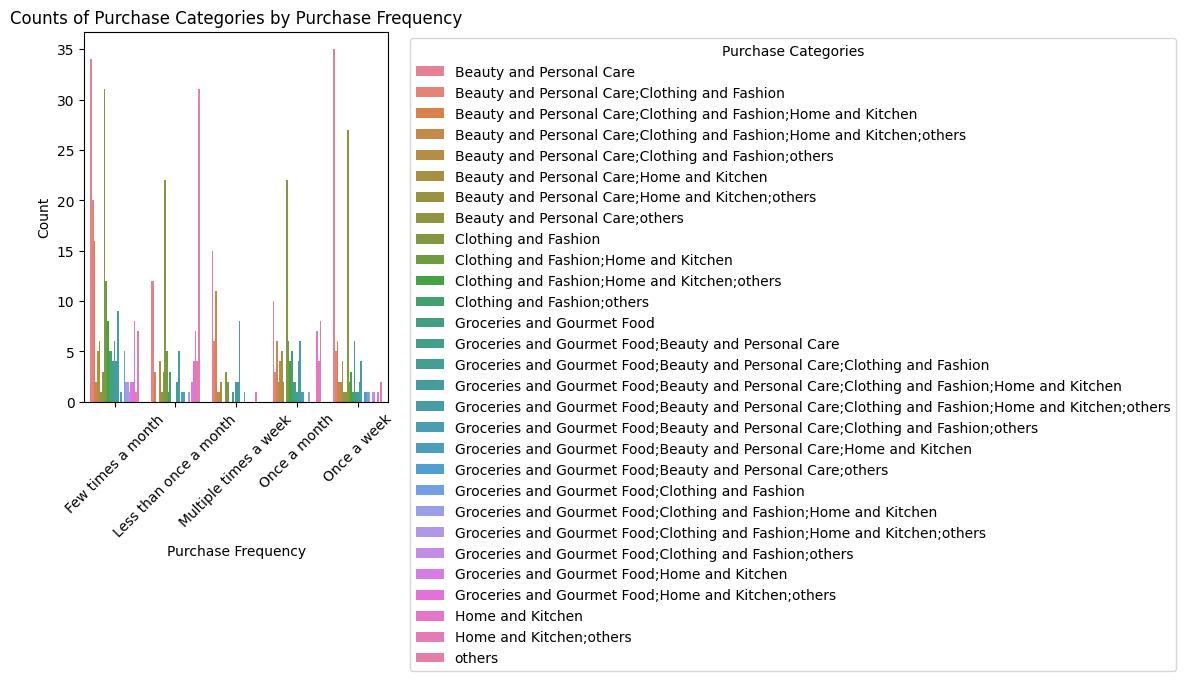

In [49]:
# Sample data
# df = pd.read_csv('your_data.csv')  # Load your dataset here

# Create a contingency table
contingency_table = pd.crosstab(
    amazon_df["Purchase_Frequency"], amazon_df["Purchase_Categories"]
)

# Convert the contingency table to a DataFrame for plotting
contingency_df = contingency_table.reset_index()

# Melt the DataFrame to long format for seaborn
contingency_df_melted = contingency_df.melt(
    id_vars="Purchase_Frequency", var_name="Purchase_Categories", value_name="Count"
)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=contingency_df_melted,
    x="Purchase_Frequency",
    y="Count",
    hue="Purchase_Categories",
)

# Add labels and title
plt.title("Counts of Purchase Categories by Purchase Frequency")
plt.xlabel("Purchase Frequency")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Purchase Categories", bbox_to_anchor=(1.05, 1), loc="upper left")

# Show the plot
plt.tight_layout()
plt.savefig("purchase_frequency_bar_plot.png", bbox_inches="tight", dpi=300)
plt.show()

In [50]:
amazon_df["Service_Appreciation"].value_counts()

Service_Appreciation
Product recommendations                185
Competitive prices                     182
Wide product selection                 149
User-friendly website/app interface     79
.                                        1
Customer service                         1
Customer service                         1
Quick delivery                           1
All the above                            1
Name: count, dtype: int64

In [51]:
amazon_df["Improvement_Areas"].value_counts()

Improvement_Areas
Customer service responsiveness                                                   216
Product quality and accuracy                                                      159
Reducing packaging waste                                                          133
Shipping speed and reliability                                                     78
Quality of product is very poor according to the big offers                         1
I don't have any problem with Amazon                                                1
User interface of app                                                               1
Irrelevant product suggestions                                                      1
User interface                                                                      1
I have no problem with Amazon yet. But others tell me about the refund issues       1
UI                                                                                  1
Scrolling option would be much bette

In [56]:
# CHI square with purchase frequency and rating accuracy

# Create categorical bins for 'Rating_Accuracy'
amazon_df["Rating_Accuracy_Cat"] = pd.cut(
    amazon_df["Rating_Accuracy "], bins=[0, 2, 3, 5], labels=["Low", "Medium", "High"]
)

# Create the contingency table
contingency_table = pd.crosstab(
    amazon_df["Purchase_Frequency"], amazon_df["Rating_Accuracy_Cat"]
)

# Display the contingency table
print("Contingency Table:")
print(contingency_table)

# Conduct the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

# Interpretation
alpha = 0.05
if p < alpha:
    print(
        "\nReject the null hypothesis: There is a significant association between Purchase Frequency and Rating Accuracy."
    )
else:
    print(
        "\nFail to reject the null hypothesis: There is no significant association between Purchase Frequency and Rating Accuracy."
    )

Contingency Table:
Rating_Accuracy_Cat     Low  Medium  High
Purchase_Frequency                       
Few times a month        81     101    20
Less than once a month   48      52    24
Multiple times a week    23      28     5
Once a month             44      47    15
Once a week              41      58    13

Chi-Square Test Results:
Chi-Square Statistic: 8.615362093225725
P-Value: 0.3757744858840413
Degrees of Freedom: 8
Expected Frequencies:
[[79.79       96.28666667 25.92333333]
 [48.98       59.10666667 15.91333333]
 [22.12       26.69333333  7.18666667]
 [41.87       50.52666667 13.60333333]
 [44.24       53.38666667 14.37333333]]

Fail to reject the null hypothesis: There is no significant association between Purchase Frequency and Rating Accuracy.


In [58]:
amazon_df.dtypes

age                                          int64
Gender                                      object
Purchase_Frequency                          object
Purchase_Categories                         object
Personalized_Recommendation_Frequency       object
Browsing_Frequency                          object
Product_Search_Method                       object
Search_Result_Exploration                   object
Customer_Reviews_Importance                  int64
Add_to_Cart_Browsing                        object
Cart_Completion_Frequency                   object
Cart_Abandonment_Factors                    object
Saveforlater_Frequency                      object
Review_Left                                 object
Review_Reliability                          object
Review_Helpfulness                          object
Personalized_Recommendation_Frequency        int64
Recommendation_Helpfulness                  object
Rating_Accuracy                              int64
Shopping_Satisfaction          

In [65]:
amazon_df.value_counts()

age  Gender             Purchase_Frequency  Purchase_Categories                                                                               Personalized_Recommendation_Frequency  Browsing_Frequency    Product_Search_Method  Search_Result_Exploration  Customer_Reviews_Importance  Add_to_Cart_Browsing  Cart_Completion_Frequency  Cart_Abandonment_Factors                    Saveforlater_Frequency  Review_Left  Review_Reliability  Review_Helpfulness  Personalized_Recommendation_Frequency   Recommendation_Helpfulness  Rating_Accuracy   Shopping_Satisfaction  Service_Appreciation     Improvement_Areas                Rating_Accuracy_Cat
3    Prefer not to say  Once a month        Home and Kitchen                                                                                  No                                     Few times a week      categories             First page                 3                            No                    Sometimes                  Found a better price elsewhere

# LOGISTIC REGRESSION

In [63]:
# Load the dataset
data = pd.read_csv("amazon_customer_data.csv")

# Check the data types and unique values in the categorical columns
for col in data.select_dtypes(include=["object"]):
    print(f"Column: {col}, Unique Values: {data[col].unique()}")

# Initialize LabelEncoder and StandardScaler
label_encoder = LabelEncoder()
scaler = StandardScaler()

# Columns for encoding and scaling
binary_col = "Review_Left"
multi_categorical_cols = [
    "Gender",
    "Add_to_Cart_Browsing",
    "Purchase_Frequency",
    "Purchase_Categories",
    "Browsing_Frequency",
    "Product_Search_Method",
    "Search_Result_Exploration",
    "Cart_Abandonment_Factors",
    "Saveforlater_Frequency",
    "Recommendation_Helpfulness",
    "Service_Appreciation",
    "Improvement_Areas",
]
numerical_cols = [
    "age",
    "Customer_Reviews_Importance",
    "Personalized_Recommendation_Frequency",
    "Rating_Accuracy ",
    "Shopping_Satisfaction",
]

# Label Encode the binary column
data[binary_col] = label_encoder.fit_transform(data[binary_col].astype(str))

# One-Hot Encode multi-category columns
data = pd.get_dummies(data, columns=multi_categorical_cols, drop_first=True)

# Check if there are still non-numeric values in numerical_cols
for col in numerical_cols:
    print(f"Column: {col}, Unique Values: {data[col].unique()}")

# Scale numerical columns (ensure they are in the right format)
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Encode the target variable if needed
data["Cart_Completion_Frequency"] = label_encoder.fit_transform(
    data["Cart_Completion_Frequency"].astype(str)
)

# Define features (X) and target (y)
X = data.drop(["Cart_Completion_Frequency"], axis=1)
y = data["Cart_Completion_Frequency"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Fit the model on the training data
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Model Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Display feature coefficients
feature_importance = pd.DataFrame(
    {"Feature": X.columns, "Coefficient": log_reg.coef_[0]}
).sort_values(by="Coefficient", ascending=False)

print(feature_importance)

Column: Timestamp, Unique Values: ['2023/06/04 1:28:19 PM GMT+5:30' '2023/06/04 2:30:44 PM GMT+5:30'
 '2023/06/04 5:04:56 PM GMT+5:30' '2023/06/04 5:13:00 PM GMT+5:30'
 '2023/06/04 5:28:06 PM GMT+5:30' '2023/06/04 6:01:59 PM GMT+5:30'
 '2023/06/04 6:31:41 PM GMT+5:30' '2023/06/04 7:13:12 PM GMT+5:30'
 '2023/06/04 7:23:21 PM GMT+5:30' '2023/06/04 7:33:12 PM GMT+5:30'
 '2023/06/04 7:45:33 PM GMT+5:30' '2023/06/04 7:48:31 PM GMT+5:30'
 '2023/06/04 8:00:11 PM GMT+5:30' '2023/06/04 8:01:45 PM GMT+5:30'
 '2023/06/04 8:02:28 PM GMT+5:30' '2023/06/04 8:20:42 PM GMT+5:30'
 '2023/06/04 8:39:53 PM GMT+5:30' '2023/06/04 8:45:45 PM GMT+5:30'
 '2023/06/04 8:46:02 PM GMT+5:30' '2023/06/04 8:48:59 PM GMT+5:30'
 '2023/06/04 8:49:49 PM GMT+5:30' '2023/06/04 8:52:49 PM GMT+5:30'
 '2023/06/04 8:54:36 PM GMT+5:30' '2023/06/04 9:10:08 PM GMT+5:30'
 '2023/06/04 9:10:51 PM GMT+5:30' '2023/06/04 9:18:12 PM GMT+5:30'
 '2023/06/04 9:22:58 PM GMT+5:30' '2023/06/04 9:29:59 PM GMT+5:30'
 '2023/06/04 9:40:54 PM GMT+

ValueError: could not convert string to float: 'Yes'

In [54]:
amazon_kmeans_dfcopy.sample(10)

age             Gender Purchase_Frequency    Browsing_Frequency  \
402   28             Female        Once a week      Few times a week   
428   21             Female  Few times a month     Few times a month   
483   45             Others  Few times a month     Few times a month   
399   35             Female  Few times a month     Few times a month   
529   28             Female        Once a week  Multiple times a day   
324   26             Female        Once a week     Few times a month   
307   22             Others        Once a week     Few times a month   
541   37             Female  Few times a month                Rarely   
551   25               Male  Few times a month     Few times a month   
82    23  Prefer not to say        Once a week  Multiple times a day   

     Customer_Reviews_Importance Add_to_Cart_Browsing  \
402                            2                  Yes   
428                            3                Maybe   
483                            2                  Yes   
399                            4                Maybe   
529                            4                   No   
324                            1                  Yes   
307                            3                   No   
541                            3                Maybe   
551                            1                  Yes   
82                             5                Maybe   

    Cart_Completion_Frequency                    Cart_Abandonment_Factors  \
402                     Often              Found a better price elsewhere   
428                 Sometimes  Changed my mind or no longer need the item   
483                     Often  Changed my mind or no longer need the item   
399                     Often              Found a better price elsewhere   
529                    Rarely  Changed my mind or no longer need the item   
324                     Often              Found a better price elsewhere   
307                     Often  Changed my mind or no longer need the item   
541                    Rarely  Changed my mind or no longer need the item   
551                 Sometimes              Found a better price elsewhere   
82                  Sometimes              Found a better price elsewhere   

     Home_Kitchen  Beauty_PersonalCare  Groceries_GourmetFood  \
402           1.0                  1.0                    0.0   
428           0.0                  1.0                    0.0   
483           0.0                  1.0                    0.0   
399           1.0                  0.0                    1.0   
529           1.0                  1.0                    1.0   
324           0.0                  1.0                    0.0   
307           0.0                  1.0                    0.0   
541           0.0                  1.0                    0.0   
551           1.0                  1.0                    0.0   
82            0.0                  1.0                    0.0   

     Clothing_Fashion  others  Cluster  
402               1.0     0.0        2  
428               0.0     0.0        1  
483               0.0     0.0        1  
399               1.0     1.0        2  
529               1.0     1.0        2  
324               0.0     0.0        0  
307               0.0     0.0        1  
541               1.0     0.0        1  
551               1.0     0.0        2  
82                0.0     0.0        1

# DECISIOn TREE

In [111]:
amazon_kmeans_dfcopy.head(10)

age             Gender      Purchase_Frequency Browsing_Frequency  \
0   23             Female       Few times a month   Few times a week   
1   23             Female            Once a month  Few times a month   
2   24  Prefer not to say       Few times a month  Few times a month   
3   24             Female            Once a month  Few times a month   
4   22             Female  Less than once a month  Few times a month   
5   21             Female  Less than once a month             Rarely   
6   22             Female  Less than once a month             Rarely   
7   21             Female       Few times a month             Rarely   
8   20             Female  Less than once a month  Few times a month   
9   23             Female  Less than once a month             Rarely   

   Customer_Reviews_Importance Add_to_Cart_Browsing Cart_Completion_Frequency  \
0                            1                  Yes                 Sometimes   
1                            1                  Yes                     Often   
2                            2                  Yes                 Sometimes   
3                            5                Maybe                 Sometimes   
4                            1                  Yes                 Sometimes   
5                            1                  Yes                    Rarely   
6                            1                  Yes                     Often   
7                            1                  Yes                     Often   
8                            1                  Yes                 Sometimes   
9                            1                  Yes                    Rarely   

                     Cart_Abandonment_Factors  Home_Kitchen  \
0              Found a better price elsewhere           0.0   
1                         High shipping costs           0.0   
2              Found a better price elsewhere           0.0   
3              Found a better price elsewhere           0.0   
4                         High shipping costs           0.0   
5  Changed my mind or no longer need the item           0.0   
6                         High shipping costs           0.0   
7              Found a better price elsewhere           0.0   
8  Changed my mind or no longer need the item           0.0   
9              Found a better price elsewhere           0.0   

   Beauty_PersonalCare  Groceries_GourmetFood  Clothing_Fashion  others  
0                  1.0                    0.0               0.0     0.0  
1                  0.0                    0.0               1.0     0.0  
2                  0.0                    1.0               1.0     0.0  
3                  1.0                    0.0               1.0     1.0  
4                  1.0                    0.0               1.0     0.0  
5                  0.0                    0.0               1.0     0.0  
6                  0.0                    0.0               1.0     0.0  
7                  1.0                    0.0               1.0     0.0  
8                  1.0                    0.0               1.0     0.0  
9                  1.0                    0.0               1.0     0.0

In [112]:
# Separate the target variable first
y = amazon_kmeans_dfcopy["Purchase_Frequency"]

# Apply one-hot encoding only on the features
X = pd.get_dummies(
    amazon_kmeans_dfcopy.drop("Purchase_Frequency", axis=1), drop_first=True
)

In [113]:
from sklearn.model_selection import train_test_split

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [114]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the decision tree classifier
tree = DecisionTreeClassifier(random_state=42)

# Train the model
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [115]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions
y_pred = tree.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.3277777777777778
Classification Report:
                         precision    recall  f1-score   support

     Few times a month       0.42      0.34      0.38        61
Less than once a month       0.51      0.50      0.51        40
 Multiple times a week       0.22      0.25      0.24        16
          Once a month       0.16      0.21      0.18        29
           Once a week       0.23      0.24      0.23        34

              accuracy                           0.33       180
             macro avg       0.31      0.31      0.31       180
          weighted avg       0.34      0.33      0.33       180



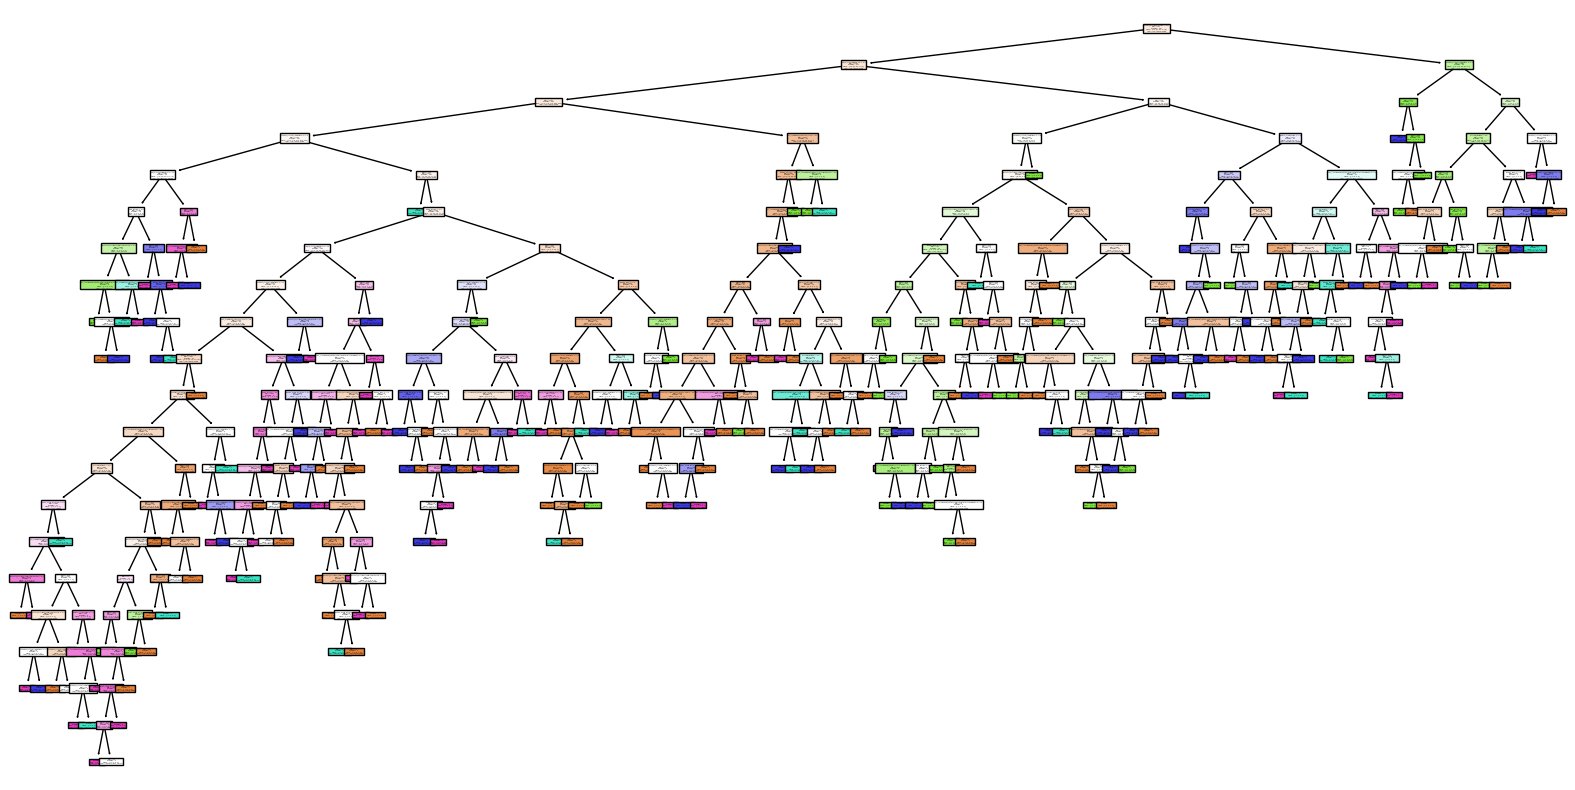

In [116]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=X.columns, class_names=y.unique(), filled=True)
plt.show()

In [117]:
feature_importances = pd.Series(tree.feature_importances_, index=X.columns).sort_values(
    ascending=False
)
print("Feature Importances:\n", feature_importances)

Feature Importances:
 age                                                        0.250549
Customer_Reviews_Importance                                0.103944
Clothing_Fashion                                           0.065875
Cart_Abandonment_Factors_Found a better price elsewhere    0.065219
Beauty_PersonalCare                                        0.051902
Browsing_Frequency_Few times a week                        0.048977
Home_Kitchen                                               0.040348
Gender_Male                                                0.036943
Browsing_Frequency_Rarely                                  0.036156
Add_to_Cart_Browsing_No                                    0.035868
Gender_Prefer not to say                                   0.033195
Browsing_Frequency_Multiple times a day                    0.030542
Cart_Completion_Frequency_Sometimes                        0.030533
Cart_Completion_Frequency_Often                            0.025674
others                    

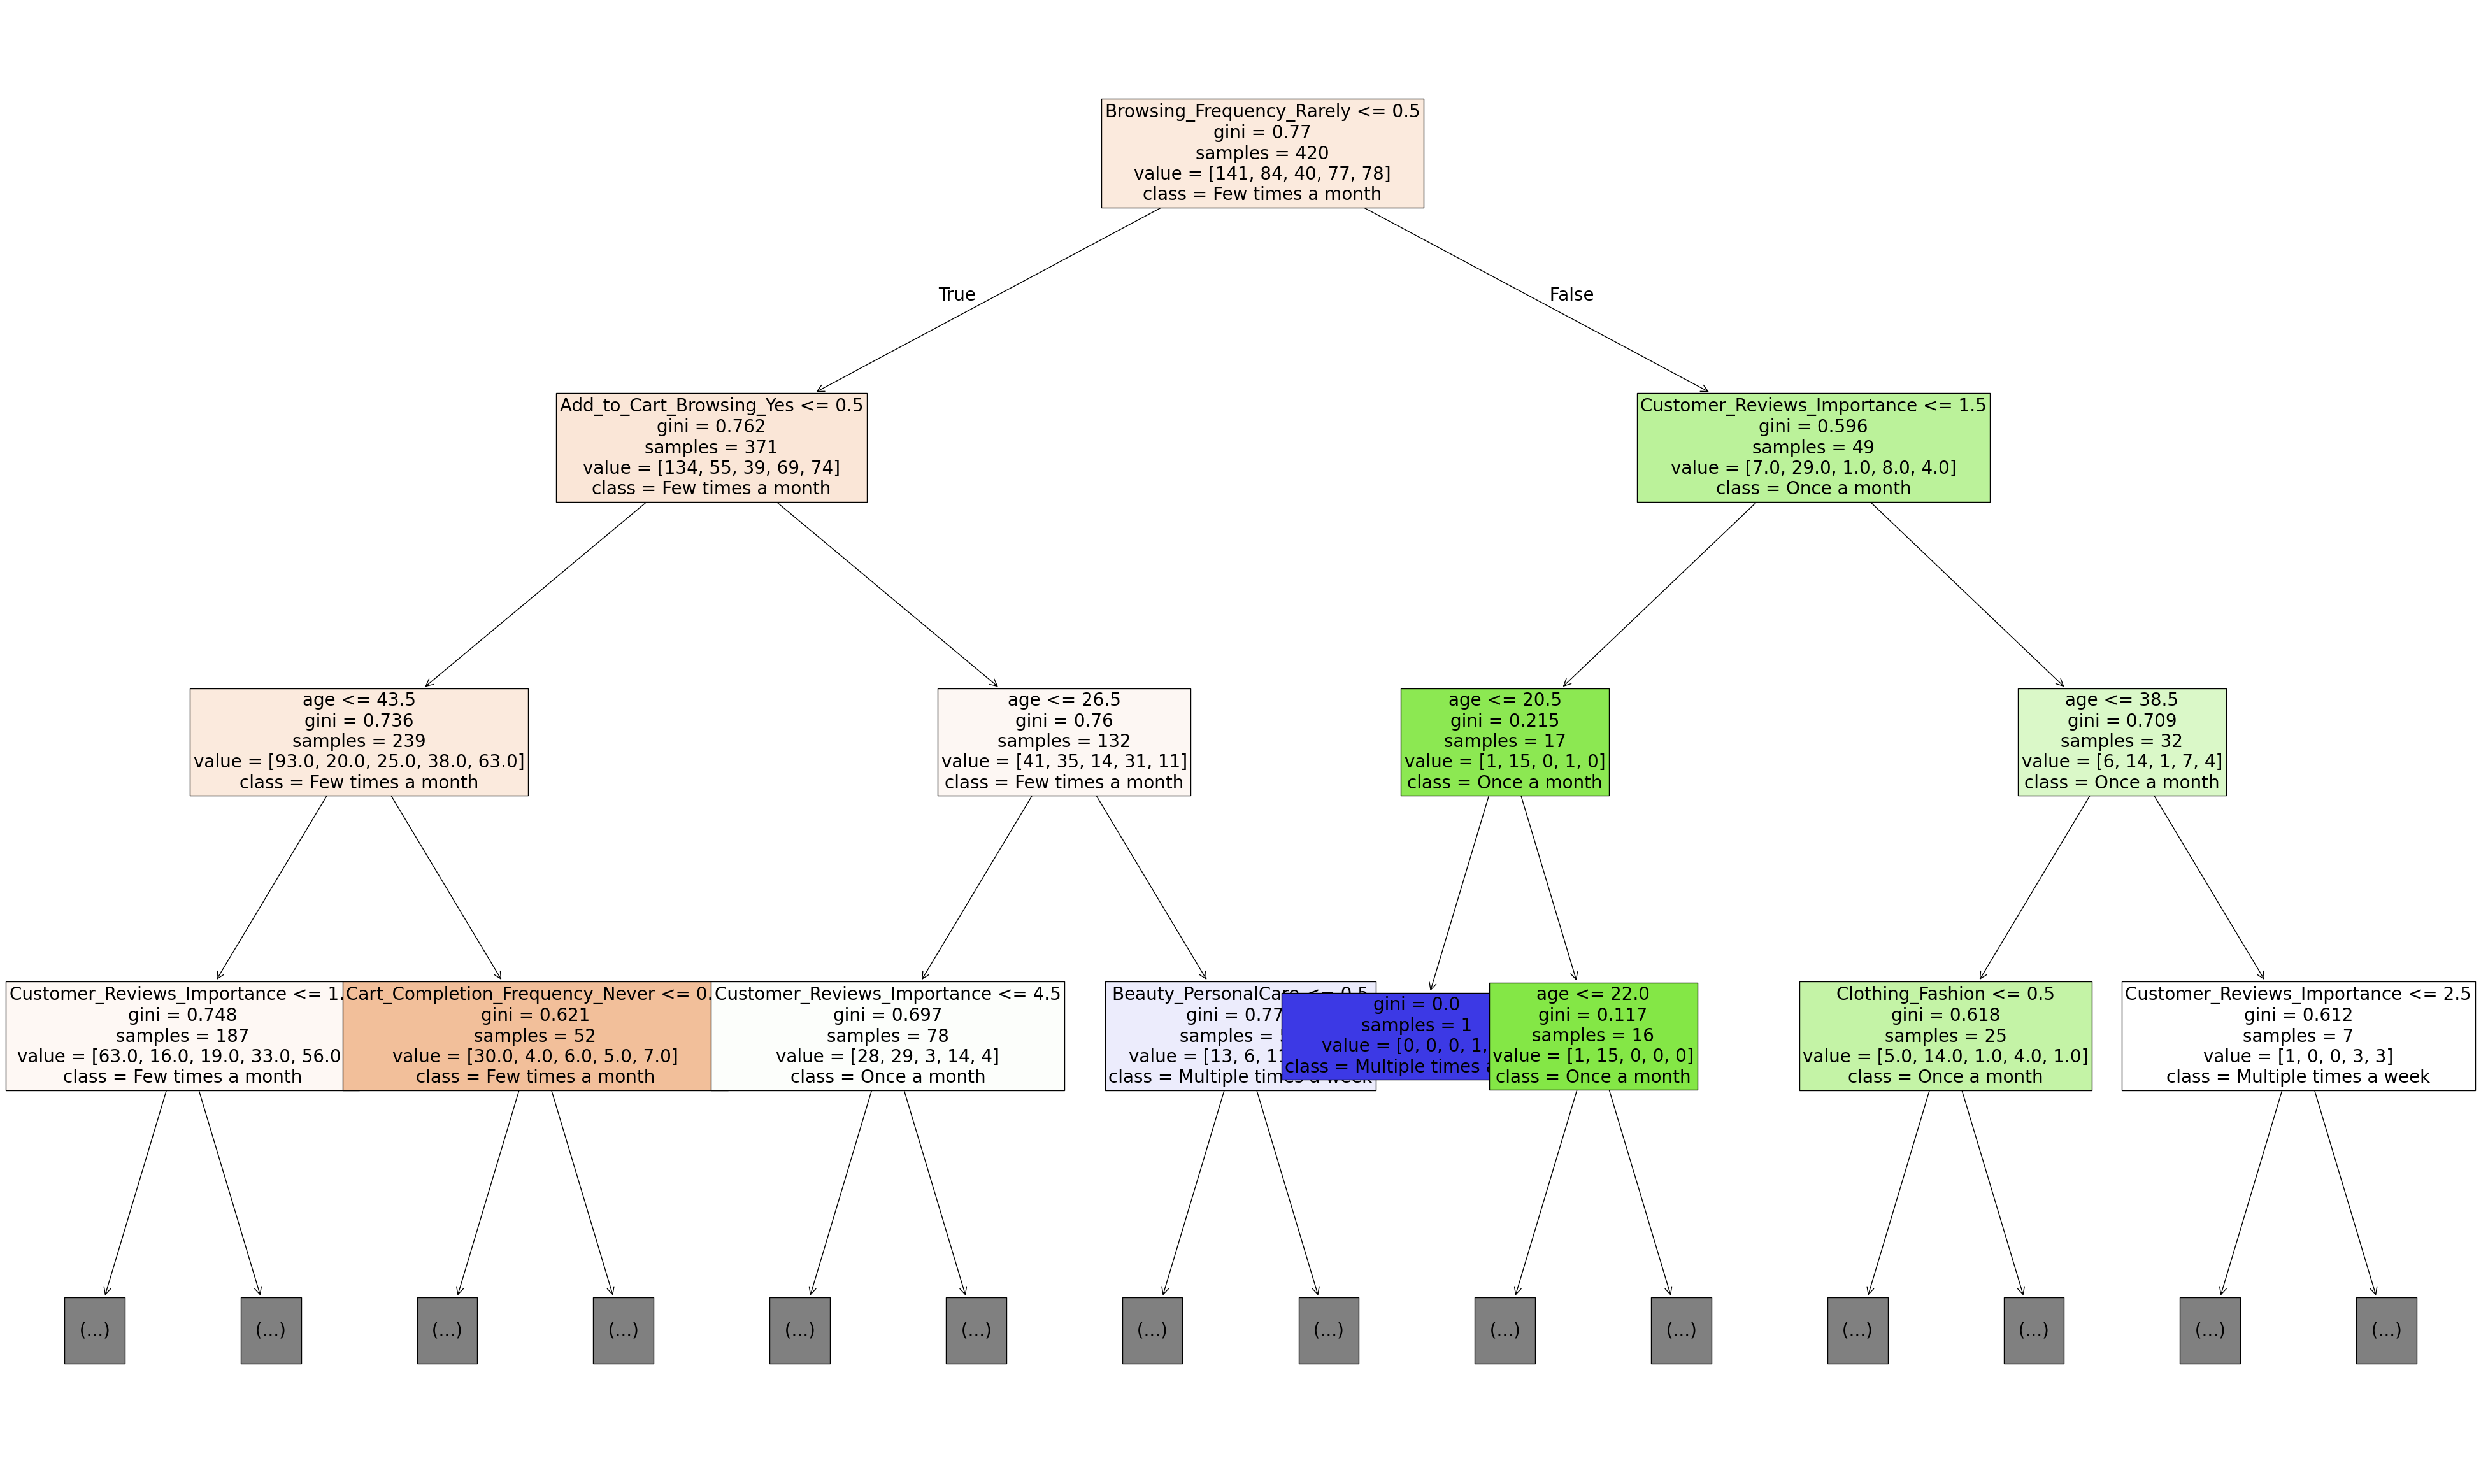

In [119]:
plt.figure(figsize=(50, 30))
plot_tree(
    tree,
    feature_names=X.columns,
    class_names=y.unique(),
    filled=True,
    max_depth=3,
    fontsize=20,
)  # Adjust max_depth as needed
plt.show()